# 🛒 Online Shoppers Purchasing Intention – Marketing Optimization with AI


## Dataset

[Online Shoppers Purchasing Intention Dataset](https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset) 

Source:[UCI Machine Learning Repository](https://archive.ics.uci.edu).

### Goal 
Build an AI system that predicts and optimizes marketing campaign effectiveness by modeling users’ purchasing intentions based on their online behavior.



### Variable information

- `Administrative, Administrative Duration, Informational, Informational Duration, Product Related` and `Product Related Duration` represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. 
    - The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. 
- `Bounce Rate, Exit Rate` and `Page Value` features represent the metrics measured by Google Analytics for each page in the e-commerce site. 
    - The value of `Bounce Rate` feature for a web page refers to the percentage of visitors who enter the site from that page and then leave (`bounce`) without triggering any other requests to the analytics server during that session. 
    - The value of `Exit Rate` feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. 
    - The `Page Value` feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 
- The `Special Day` feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. 
    - The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 

The dataset also includes `operating system, browser, region, traffic type, visitor type` as returning or new visitor, a Boolean value indicating whether the date of the visit is `weekend`, and `month` of the year.

# Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.stats import skew, kurtosis
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu, kruskal
from statsmodels.stats.outliers_influence import variance_inflation_factor # type: ignore

# Global style
sns.set_theme(style="whitegrid", palette="colorblind")

import warnings  # noqa: E402
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load data

In [2]:
# Read data
df = pd.read_csv("../data/raw/online_shoppers_intention.csv", sep=",")
df1 = df.copy()

In [3]:
# Displaying first rows 
df1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### Variable definition

| Variable Name | Description  |
|---:|:-------------|
| **Administrative** | Number of pages visited by the visitor about account management  |  
| **dministrative duration** | Total amount of time (in seconds) spent by the visitor on account management related pages  |
| **Informational** | Number of pages visited by the visitor about Web site, communication and address information of the shopping site  |
| **Informational duration** | Total amount of time (in seconds) spent by the visitor on informational pages  |
| **Product related** |  Number of pages visited by visitor about product related pages  |
| **Product related duration** | Total amount of time (in seconds) spent by the visitor on product related pages |
| **Bounce rate** | Average bounce rate value of the pages visited by the visitor  |
| **Exit rate** | Average exit rate value of the pages visited by the visitor  |
| **Page value** | Average page value of the pages visited by the visitor  |
| **Special day** | Closeness of the site visiting time to a special day  |
| **OperatingSystems** | Operating system of the visitor  |
| **Browser** | Browser of the visitor  |
| **Region** | Geographic region from which the session has been started by the visitor   |
| **TrafficType** | Traffic source by which the visitor has arrived at the Web site (e.g., banner, SMS, direct)  |
| **VisitorType** | Visitor type as `New Visitor,` `Returning Visitor,` and `Other`  |
| **Weekend** | Boolean value indicating whether the date of the visit is weekend  |
| **Month** | Month value of the visit date   |
| **Revenue** | Class label indicating whether the visit has been finalized with a transaction  |

# Exploratory Data Analysis (EDA)

In [ ]:
# Columns data
print(df1.columns)
print(f"\nThe dataset has {len(df.columns)} columns.")

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

The dataset has 18 columns.


In [ ]:
# Data information 
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
# Check null values 
df1.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [ ]:
# Check duplicated rows
df1.duplicated().value_counts() 

False    12205
True       125
Name: count, dtype: int64

In [ ]:
# Duplicated rows
duplicated_rows = df1[df1.duplicated()]

# Print the duplicated rows
duplicated_rows

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
158,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
178,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
418,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,1,1,1,1,Returning_Visitor,True,False
456,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,4,1,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11934,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,2,New_Visitor,False,False
11938,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,4,1,Returning_Visitor,True,False
12159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,3,Returning_Visitor,False,False
12180,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,13,9,20,Returning_Visitor,False,False


In [ ]:
# Data description 
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


- ProductRelated
    - mean = 31.73 -> on average, users view about 32 product-related pages.
    - std = 44.48 -> very high variability, meaning some users browse a lot more than others.
    - min = 0 -> some users don’t view any product pages.
    - 25% (Q1) = 7 -> at least 25% of users view <= 7 product pages.
    - 50% (Q2,median) = 18 -> half of users view <= 18 product pages.
    - 75% (Q3) = 38 -> 75% of users view <= 38 product pages.
    - max = 705 -> extreme outliers exist where users browse hundreds of product pages.

`Most users explore a modest number of products (7–38), but a small group browses extensively (hundreds of products).`

- BounceRates
    - mean = 0.022 -> on average, very few sessions bounce.
    - std = 0.048 -> variability exists, but bounded.
    - min = 0 -> some pages never bounce.
    - 25% (Q1) = 0.000 -> at least 25% of sessions have a 0% bounce rate.
    - 50% (median) = 0.0031 -> half the sessions have bounce rates <= 0.3%.
    - 75% (Q3) = 0.0168 -> 75% of sessions bounce less than 2%.
    - max = 0.20 -> in the worst case, 1 in 5 visits result in a bounce.

`The majority of sessions don’t bounce at all (median near 0), but there’s a long tail of higher bounce rates on specific pages. `

- PageValues
    - mean = 5.89 -> average value per session is small.
    - std = 18.57 -> very high variability compared to the mean.
    - min = 0 -> many sessions don’t contribute any value (no purchase).
    - 25% (Q1) = 0.000 -> at least 25% of sessions have no transaction.
    - 50% (median) = 0.000 →-> more than half of all sessions end with no value.
    - 75% (Q3) = 0.000 -> even 75% of sessions have no value at all.
    - max = 361.76 -> a small number of sessions generate very high value.
    
`The distribution is extremely imbalanced. Most sessions produce no revenue (PageValue=0), while a small fraction yield large returns.`

## Univariate Analysis

In [ ]:
# Get numerical, categorical, and boolean features
numerical_features = df1.select_dtypes(include=['number']).columns.tolist()
categorical_features = df1.select_dtypes(include=['object', 'category']).columns.tolist()
boolean_features = df1.select_dtypes(include=['bool']).columns.tolist()


print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)
print("Boolean Features:", boolean_features)

Numerical Features: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']
Categorical Features: ['Month', 'VisitorType']
Boolean Features: ['Weekend', 'Revenue']


In [11]:
# https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm

def classify_distribution(data):
    """
    Classify distribution shape based on skewness and kurtosis.
    Returns: (skew, kurt, label)
    """
    data = data.dropna()
    skew_val = skew(data)
    kurt_val = kurtosis(data, fisher=False)  # Pearson definition (normal=3)

    # Heuristic rules
    if abs(skew_val) < 0.5 and abs(kurt_val - 3) < 0.5:
        label = "Normal Distribution"
    elif abs(skew_val) < 0.5 and kurt_val > 4:
        label = "Double Exponential Distribution (symmetric, heavy tails)"
    elif abs(skew_val) > 1 and kurt_val > 20:  
        label = "Cauchy Distribution (extremely heavy tails)"
    elif skew_val > 1 and kurt_val > 3.5:
        label = "Weibull Distribution (right-skewed, heavy tails)"
    elif skew_val < -1 and kurt_val > 3.5:
        label = "Weibull-like Distribution (left-skewed, heavy tails)"
    else:
        label = "Other / ~ Non-Normal Distribution"

    return skew_val, kurt_val, label

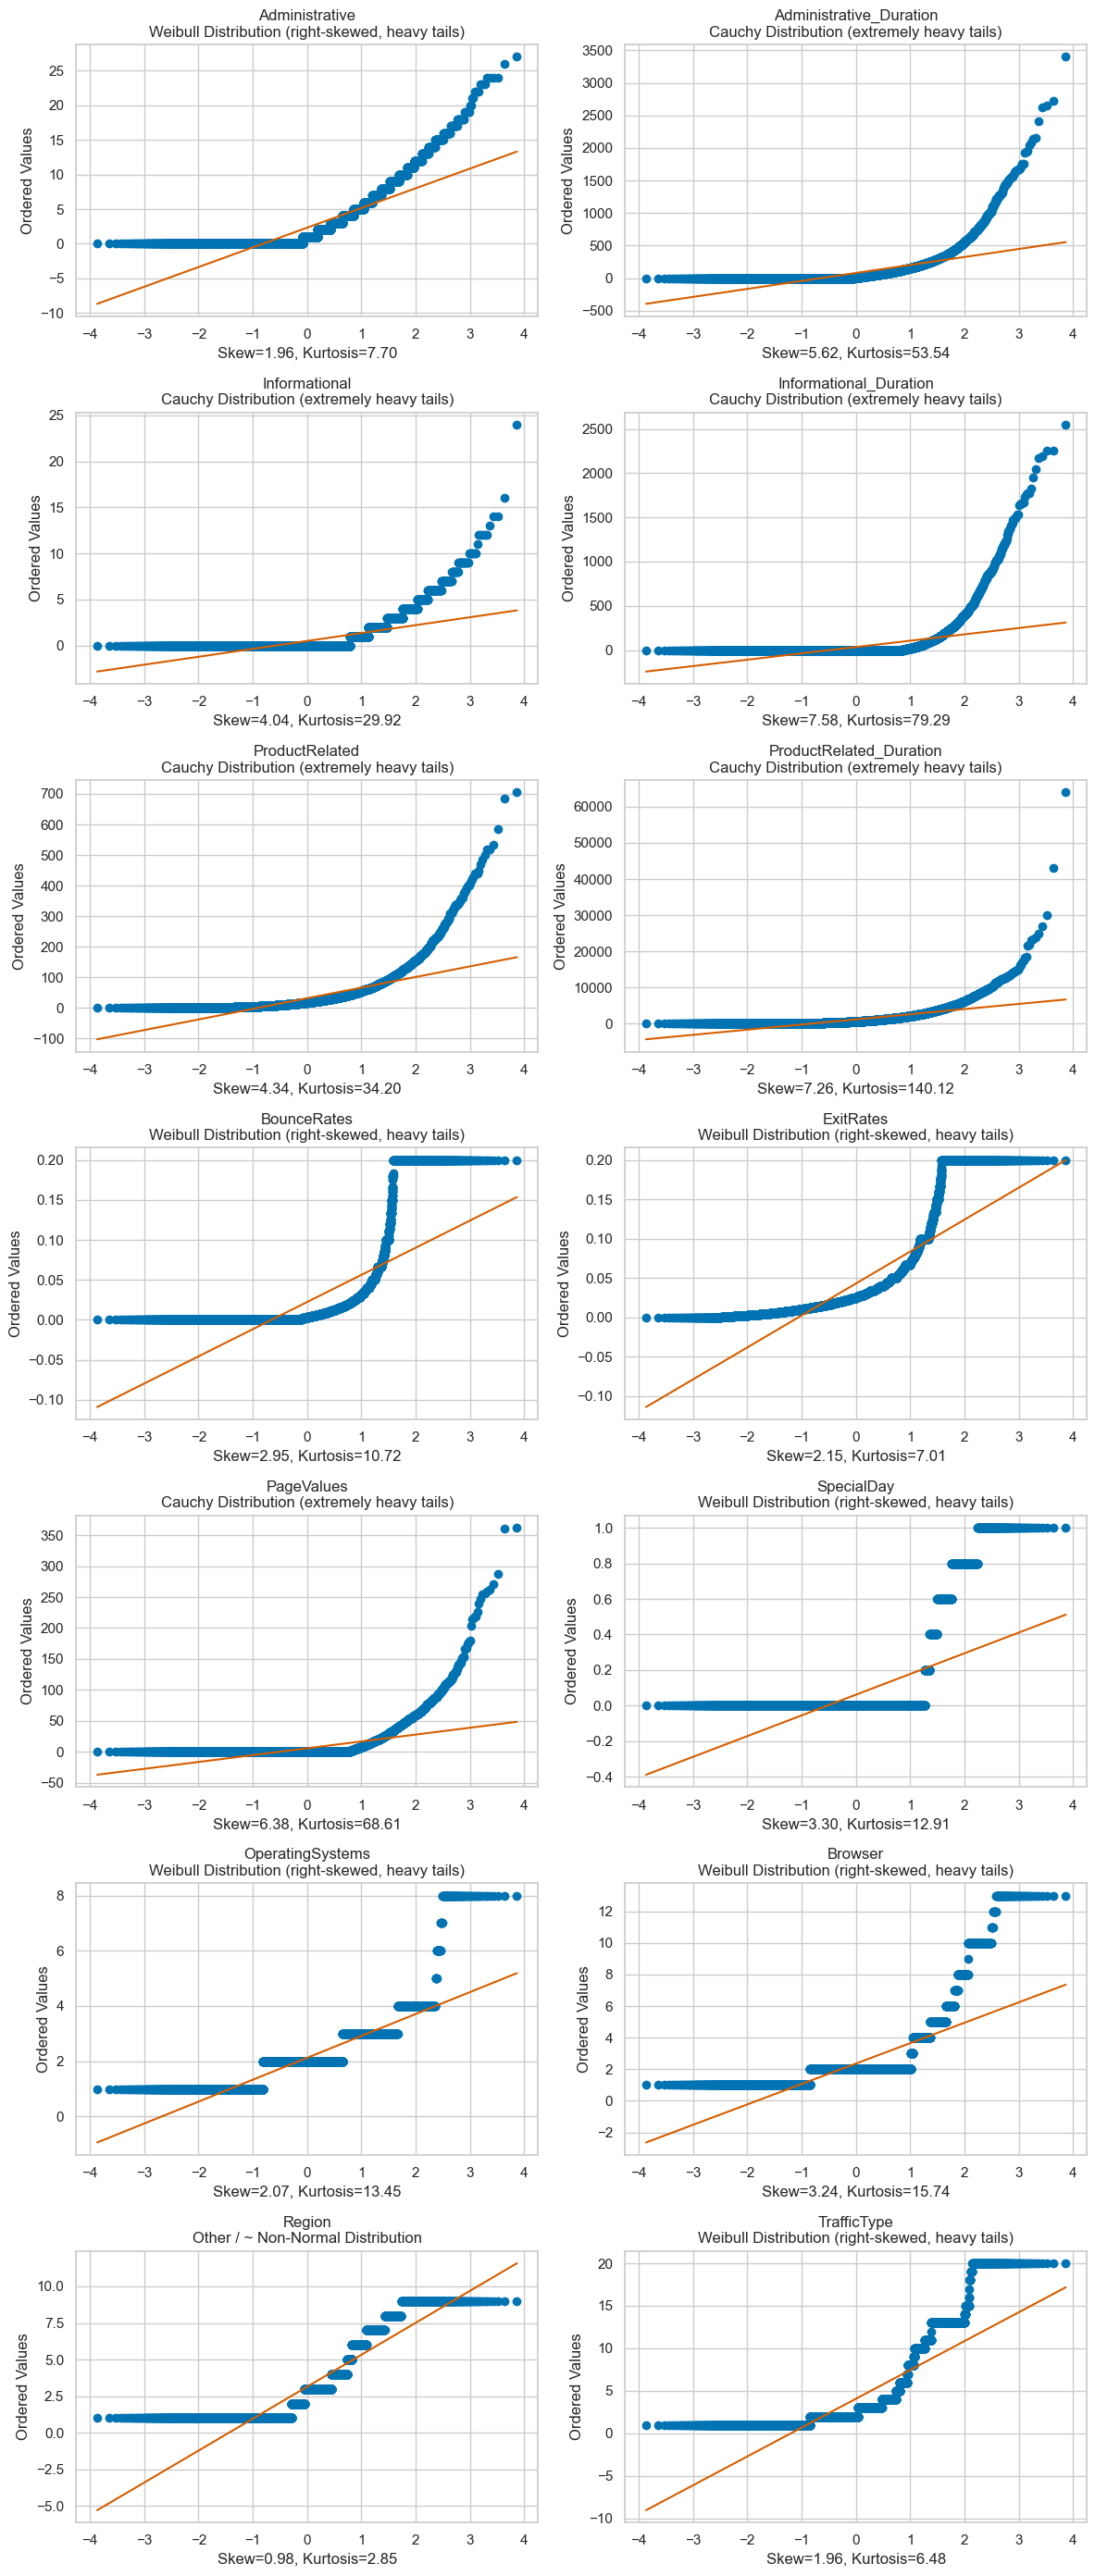

In [12]:
# Number of numerical features
n_features = len(numerical_features)

# Define grid (2 columns)
n_cols = 2
n_rows = (n_features + 1) // n_cols  # ceiling division for rows

plt.figure(figsize=(12, n_rows * 4))

for i, feature in enumerate(numerical_features, 1):
    data = df1[feature].dropna()

    # Classify distribution
    skew_val, kurt_val, label = classify_distribution(data)

    # QQ-plot
    plt.subplot(n_rows, n_cols, i)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'{feature}\n{label}', fontsize=12)
    plt.xlabel(f"Skew={skew_val:.2f}, Kurtosis={kurt_val:.2f}")

plt.tight_layout();

Since none of the features are normally distributed, statistical methods that assume normality (e.g., t-test, ANOVA, linear regression without transformation) may not be appropriate. We may consider:
- Using **non-parametric tests** (e.g., Mann–Whitney U, Kruskal–Wallis).  
- Applying **transformations** (e.g., log, Box–Cox, Yeo–Johnson) to reduce skewness.  
- Or relying on **tree-based machine learning models**, which are robust to non-normal data.  


In [13]:
# Select categorical and boolean columns
cat_bool_cols = df1.select_dtypes(include=['object', 'category', 'bool']).columns

print("Categorical & Boolean Feature Profiling:\n")

for col in cat_bool_cols:
    print(f"Feature: {col}")
    unique_vals = df1[col].nunique()
    print(f"- Unique values: {unique_vals}")
    
    # Value counts & proportions
    value_counts = df1[col].value_counts(dropna=False)
    value_props = df1[col].value_counts(normalize=True, dropna=False)
    
    # Combine into a table
    summary_df = pd.DataFrame({
        'Count': value_counts,
        'Proportion': value_props
    })
    print(summary_df)
    
    # Identify rare categories (<5% of data)
    rare_threshold = 0.05
    rare_categories = summary_df[summary_df['Proportion'] < rare_threshold]
    if not rare_categories.empty:
        print(f"- Rare categories (<5%): {list(rare_categories.index)}")
    else:
        print("- No rare categories detected")
    
    print("-" * 75, "\n")


Categorical & Boolean Feature Profiling:

Feature: Month
- Unique values: 10
       Count  Proportion
Month                   
May     3364    0.272830
Nov     2998    0.243147
Mar     1907    0.154663
Dec     1727    0.140065
Oct      549    0.044526
Sep      448    0.036334
Aug      433    0.035118
Jul      432    0.035036
June     288    0.023358
Feb      184    0.014923
- Rare categories (<5%): ['Oct', 'Sep', 'Aug', 'Jul', 'June', 'Feb']
--------------------------------------------------------------------------- 

Feature: VisitorType
- Unique values: 3
                   Count  Proportion
VisitorType                         
Returning_Visitor  10551    0.855718
New_Visitor         1694    0.137388
Other                 85    0.006894
- Rare categories (<5%): ['Other']
--------------------------------------------------------------------------- 

Feature: Weekend
- Unique values: 2
         Count  Proportion
Weekend                   
False     9462    0.767397
True      2868    0.2

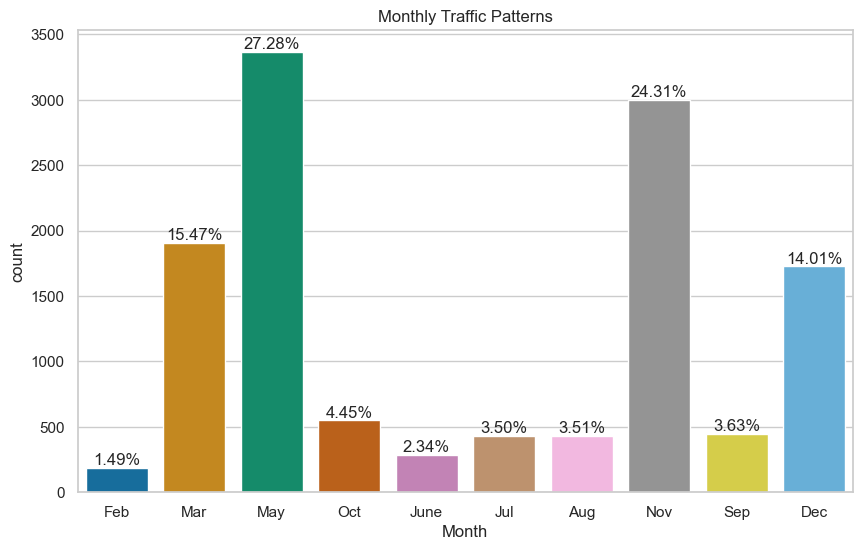

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Month', data=df1, hue='Month', legend=False)

# Get the total count of the type column
total = df1['Month'].count()

# Annotate the bars with fmt from matplotlib 
for c in ax.containers:
    ax.bar_label(c, fmt=lambda x: f'{(x/total)*100:0.2f}%')

plt.title("Monthly Traffic Patterns");

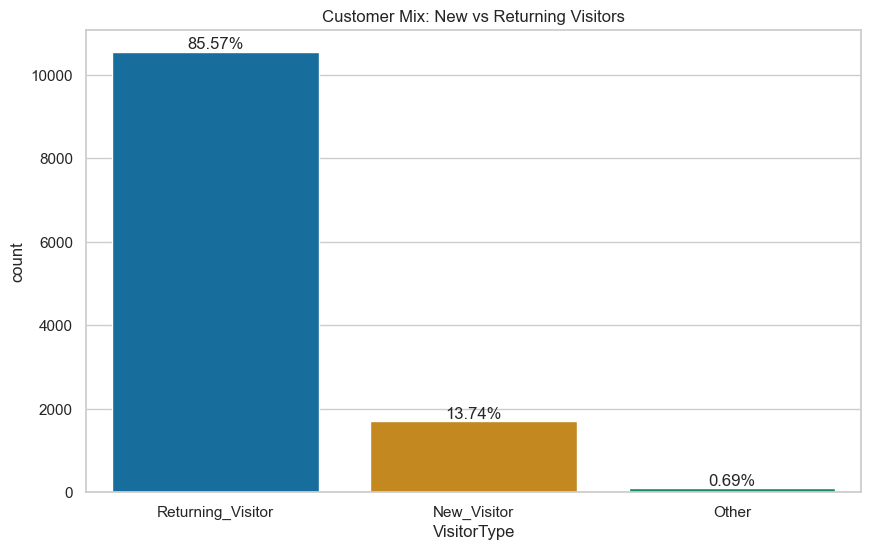

In [15]:
fig = plt.figure(figsize=(10, 6))
ax = sns.countplot(x='VisitorType', data=df1, hue='VisitorType', legend=False)

# get the total count of the type column
total = df1['VisitorType'].count()

# annotate the bars with fmt from matplotlib v3.7.0
for c in ax.containers:
    ax.bar_label(c, fmt=lambda x: f'{(x/total)*100:0.2f}%')

plt.title("Customer Mix: New vs Returning Visitors");

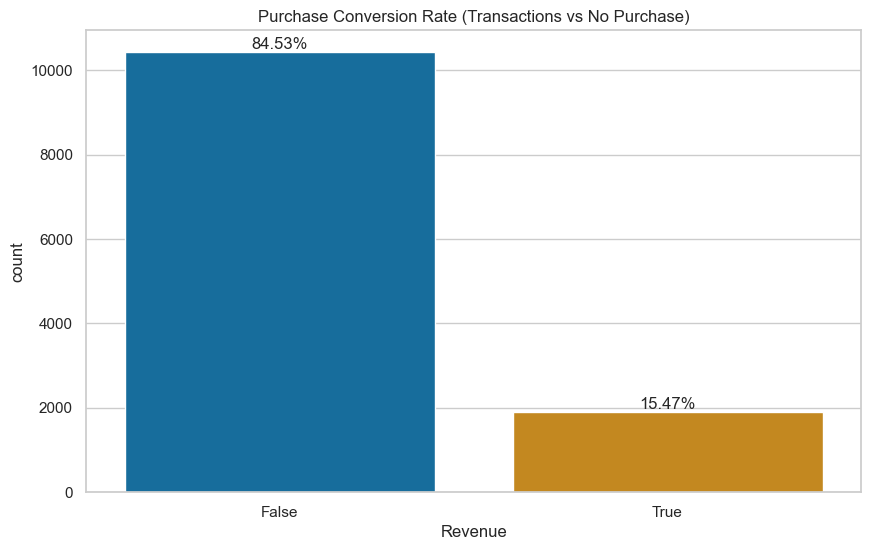

In [16]:
fig = plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Revenue', data=df1, hue='Revenue', legend=False)

# get the total count of the type column
total = df1['Revenue'].count()

# annotate the bars with fmt from matplotlib v3.7.0
for c in ax.containers:
    ax.bar_label(c, fmt=lambda x: f'{(x/total)*100:0.2f}%')

plt.title("Purchase Conversion Rate (Transactions vs No Purchase)");

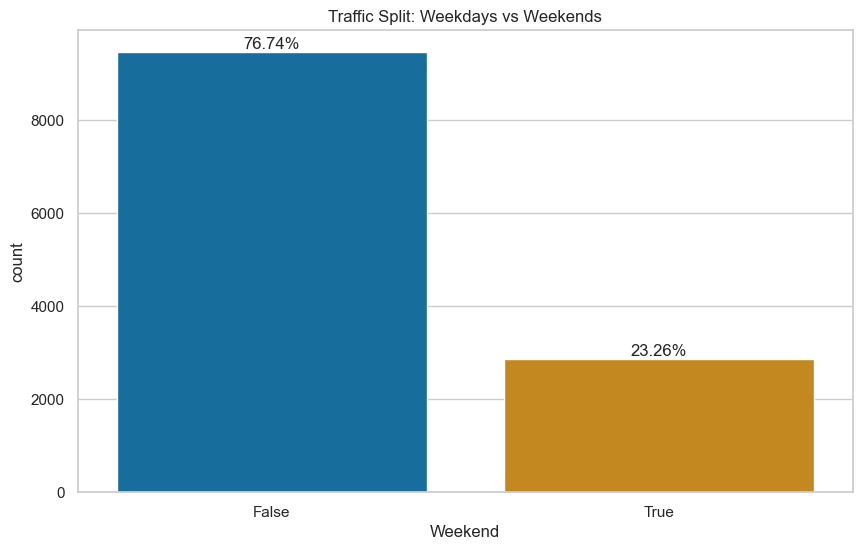

In [17]:
fig = plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Weekend', data=df1, hue='Weekend', legend=False)

# get the total count of the type column
total = df1['Weekend'].count()

# annotate the bars with fmt from matplotlib v3.7.0
for c in ax.containers:
    ax.bar_label(c, fmt=lambda x: f'{(x/total)*100:0.2f}%')

plt.title("Traffic Split: Weekdays vs Weekends");

In [18]:
# Count the no. of OS
month_counts = df1['OperatingSystems'].value_counts().sort_index()
print(month_counts)

OperatingSystems
1    2585
2    6601
3    2555
4     478
5       6
6      19
7       7
8      79
Name: count, dtype: int64


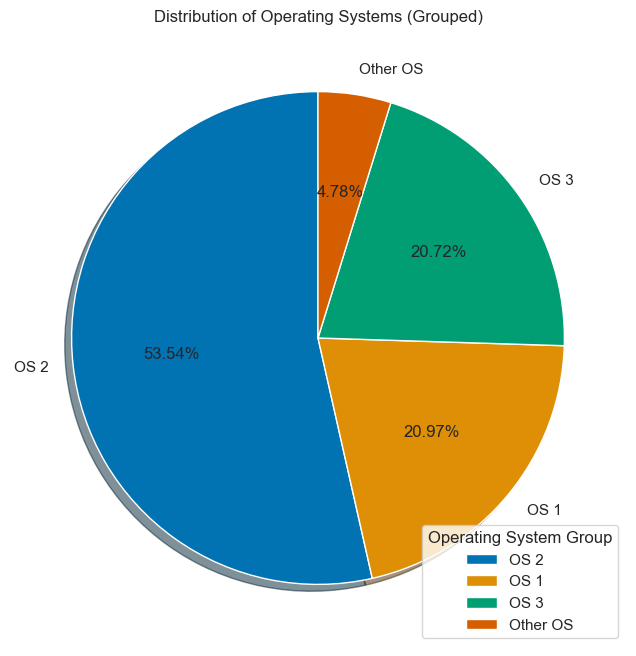

In [19]:
# Create a new column with 4 categories
def map_os(os):
    if os == 1:
        return 'OS 1'
    elif os == 2:
        return 'OS 2'
    elif os == 3:
        return 'OS 3'
    else:
        return 'Other OS'

df1['OS_Group'] = df1['OperatingSystems'].apply(map_os)

# Count values by group
os_counts = df1['OS_Group'].value_counts()

# Pie plot
fig, ax = plt.subplots(figsize=(12, 8))
# colors = sns.color_palette("colorblind", n_colors=len(os_counts))
ax.pie(
    os_counts, 
    labels=os_counts.index, 
    shadow=True,
    autopct='%1.2f%%', 
    startangle=90,
    # colors=colors
)
plt.legend(title="Operating System Group")
ax.set_title("Distribution of Operating Systems (Grouped)");

95.23% of visitor sessions come from the top three operating systems. Prioritizing these platforms can help improve user experience and drive revenue.

In [20]:
# checking the no. of Browser is having
df1['Browser'].value_counts()

Browser
2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: count, dtype: int64

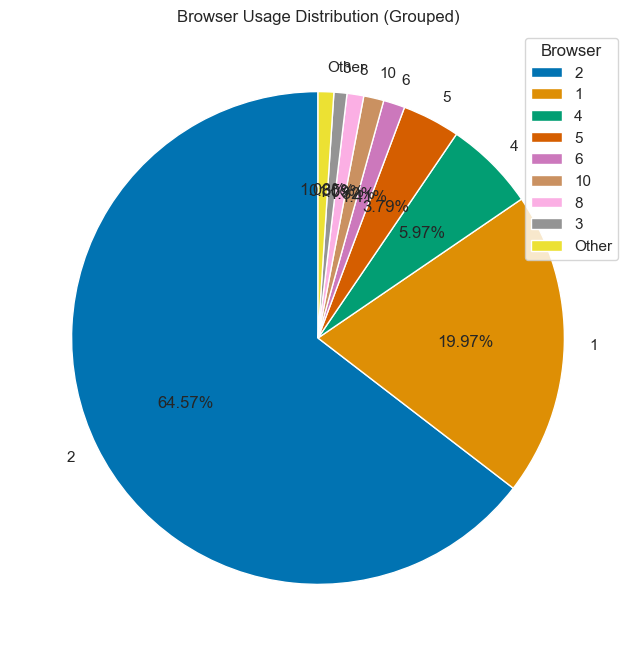

In [21]:
# Count occurrences
browser_counts = df['Browser'].value_counts()

# Group categories with <100 counts into 'Other'
threshold = 100
browser_grouped = browser_counts.copy()
other_sum = browser_grouped[browser_grouped < threshold].sum()
browser_grouped = browser_grouped[browser_grouped >= threshold]
browser_grouped['Other'] = other_sum

# Pie chart
fig, ax = plt.subplots(figsize=(12, 8))
# colors = sns.color_palette("colorblind", n_colors=len(browser_grouped))
ax.pie(
    browser_grouped, 
    labels=browser_grouped.index, 
    autopct='%1.2f%%', 
    startangle=90, 
    # colors=colors, 
    shadow=False
)

plt.title("Browser Usage Distribution (Grouped)")
plt.legend(title="Browser");

90.5% of sessions were conducted using the top three browsers.

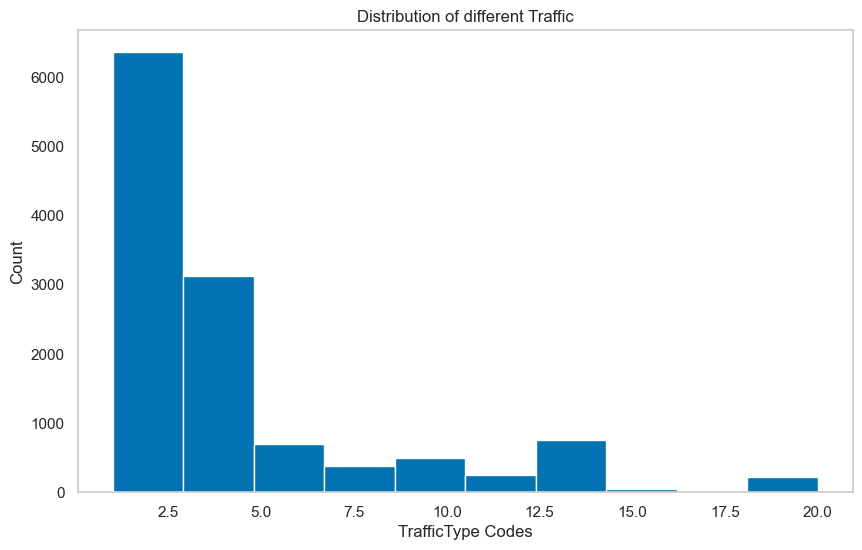

In [22]:
fig = plt.figure(figsize=(10, 6))
plt.hist(df1['TrafficType'])
plt.title('Distribution of different Traffic')
plt.xlabel('TrafficType Codes')
plt.ylabel('Count')
plt.grid();

The distribution of traffic types is non-normal (not Gaussian).

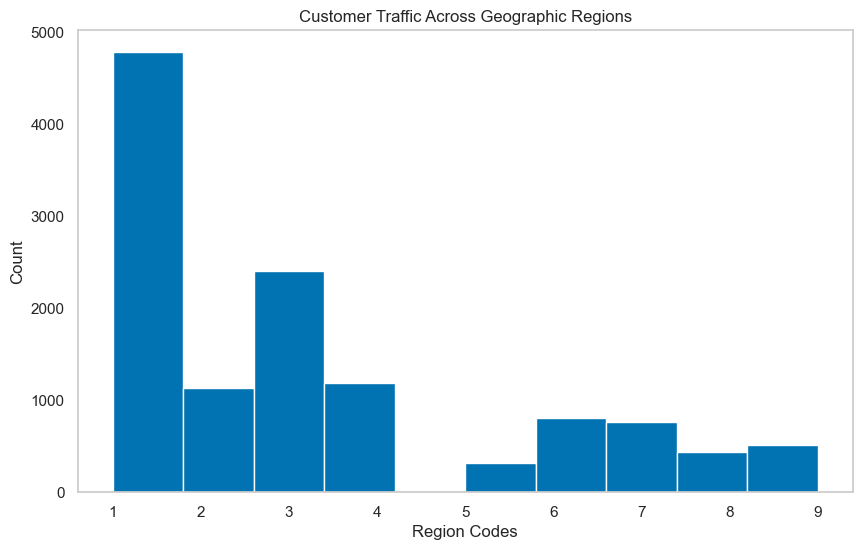

In [23]:
fig = plt.figure(figsize=(10, 6))
plt.hist(df1['Region'])
plt.title('Customer Traffic Across Geographic Regions')
plt.xlabel('Region Codes')
plt.ylabel('Count')
plt.grid();

The distribution of sessions across different regions is not normally distributed.

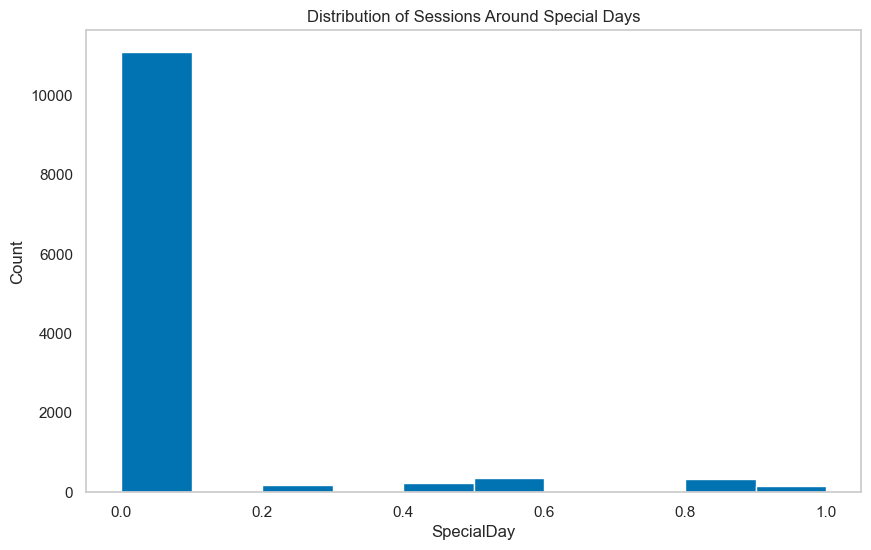

In [24]:
fig = plt.figure(figsize=(10, 6))
plt.hist(df1['SpecialDay'])
plt.title('Distribution of Sessions Around Special Days')
plt.xlabel('SpecialDay')
plt.ylabel('Count')
plt.grid();

## Bi-variate Analysis

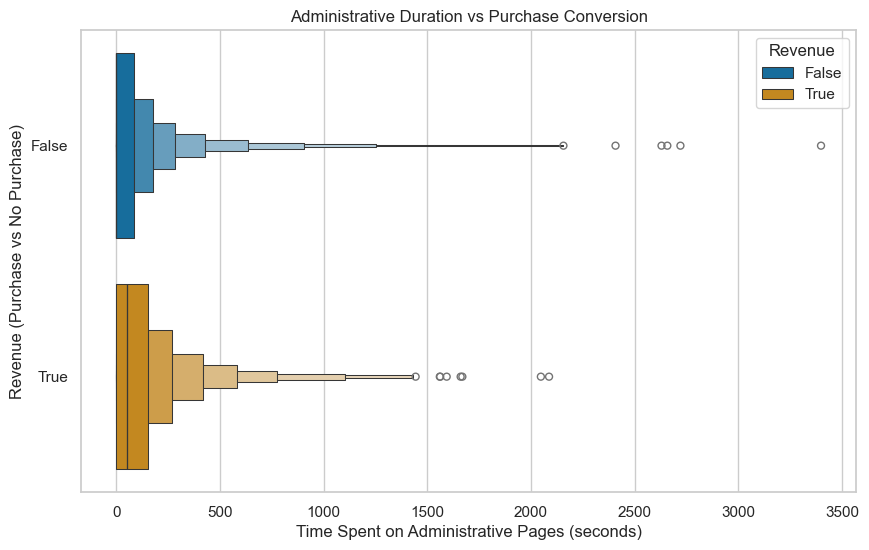

In [25]:
# Administrative Duration vs Revenue
plt.figure(figsize=(10, 6))
sns.boxenplot(x='Administrative_Duration', y='Revenue', data=df1, hue='Revenue', orient='h')
plt.title('Administrative Duration vs Purchase Conversion')  
plt.xlabel('Time Spent on Administrative Pages (seconds)')
plt.ylabel('Revenue (Purchase vs No Purchase)');

A few sessions spend unusually long times on administrative pages, affecting both purchase and non-purchase sessions. These outliers may indicate navigation or usability issues.

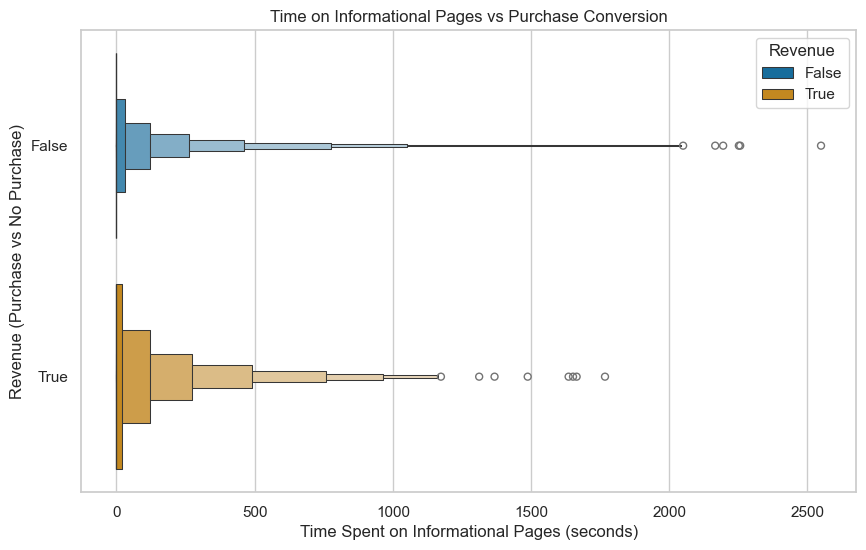

In [26]:
# Informational Duration vs Revenue
plt.figure(figsize=(10, 6))
sns.boxenplot(x='Informational_Duration', y='Revenue', data=df, hue='Revenue', orient='h')
plt.title('Time on Informational Pages vs Purchase Conversion')
plt.xlabel('Time Spent on Informational Pages (seconds)')
plt.ylabel('Revenue (Purchase vs No Purchase)');

Some users spend extremely long or short times on informational pages, though most sessions show minimal engagement.

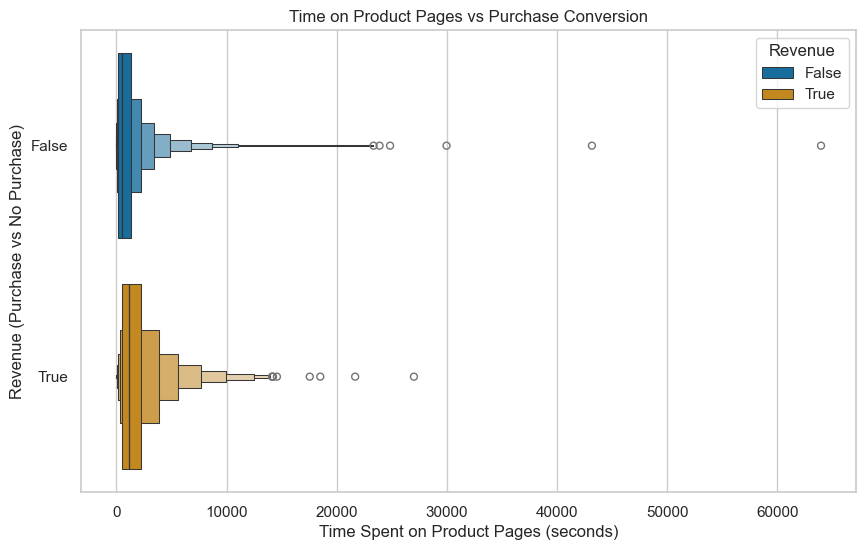

In [27]:
# Product Related Duration vs Revenue
plt.figure(figsize=(10, 6))
sns.boxenplot(x='ProductRelated_Duration', y='Revenue', data=df, hue='Revenue', orient='h')
plt.title('Time on Product Pages vs Purchase Conversion')
plt.xlabel('Time Spent on Product Pages (seconds)')
plt.ylabel('Revenue (Purchase vs No Purchase)');

A small number of sessions involve very high product page browsing time, mostly from users who eventually purchase, highlighting highly engaged buyers.

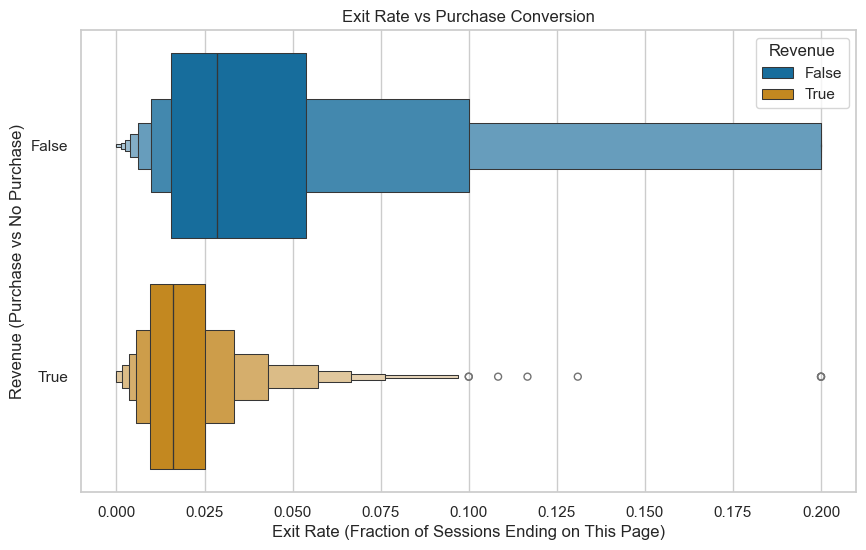

In [28]:
# Exit Rate vs Revenue
plt.figure(figsize=(10, 6))
sns.boxenplot(x='ExitRates', y='Revenue', data=df, hue='Revenue', orient='h')
plt.title('Exit Rate vs Purchase Conversion')
plt.xlabel('Exit Rate (Fraction of Sessions Ending on This Page)')
plt.ylabel('Revenue (Purchase vs No Purchase)');

Unusually high exit rates occur primarily in sessions that do not result in a purchase, indicating that certain pages may be causing users to leave before completing a transaction. Optimizing these pages could help improve conversions.

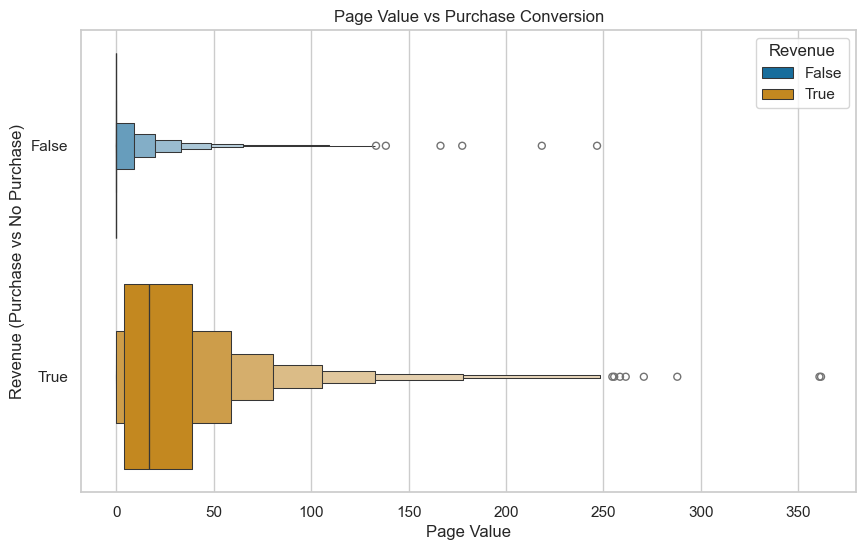

In [29]:
# Page Values vs Revenue
plt.figure(figsize=(10, 6))
sns.boxenplot(x='PageValues', y='Revenue', data=df, hue='Revenue', orient='h')
plt.title('Page Value vs Purchase Conversion')
plt.xlabel('Page Value')
plt.ylabel('Revenue (Purchase vs No Purchase)');

Both purchase and non-purchase sessions show extreme Page Values, indicating that a few high-value transactions disproportionately impact revenue.

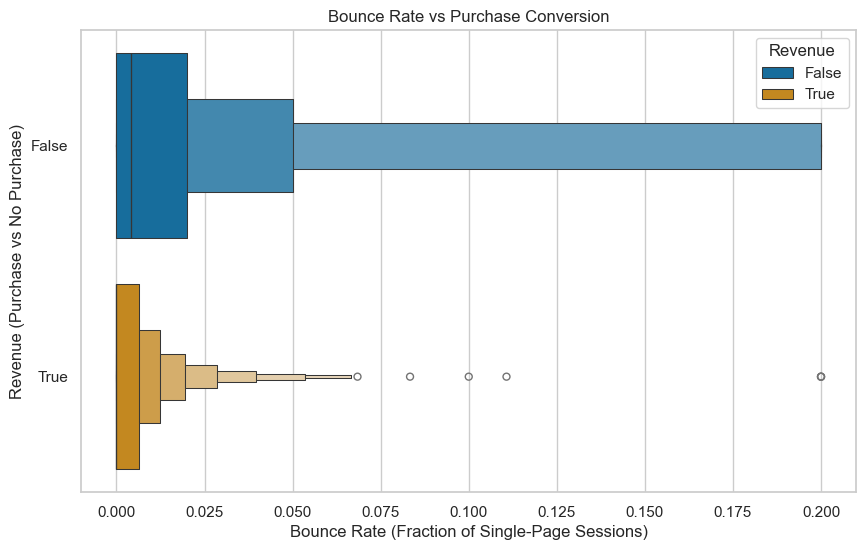

In [30]:
# Bounce Rates vs Revenue
plt.figure(figsize=(10, 6))
sns.boxenplot(x='BounceRates', y='Revenue', data=df, hue='Revenue', orient='h')
plt.title('Bounce Rate vs Purchase Conversion')
plt.xlabel('Bounce Rate (Fraction of Single-Page Sessions)')
plt.ylabel('Revenue (Purchase vs No Purchase)');

- Non-purchase sessions:
    - High bounce rates occur primarily in sessions that do not result in a purchase, indicating that certain pages may be causing users to leave before completing a transaction.
- Purchase sessions:
    - Some sessions that result in a purchase exhibit unusually high bounce rates, suggesting that users briefly leave pages but still complete transactions.

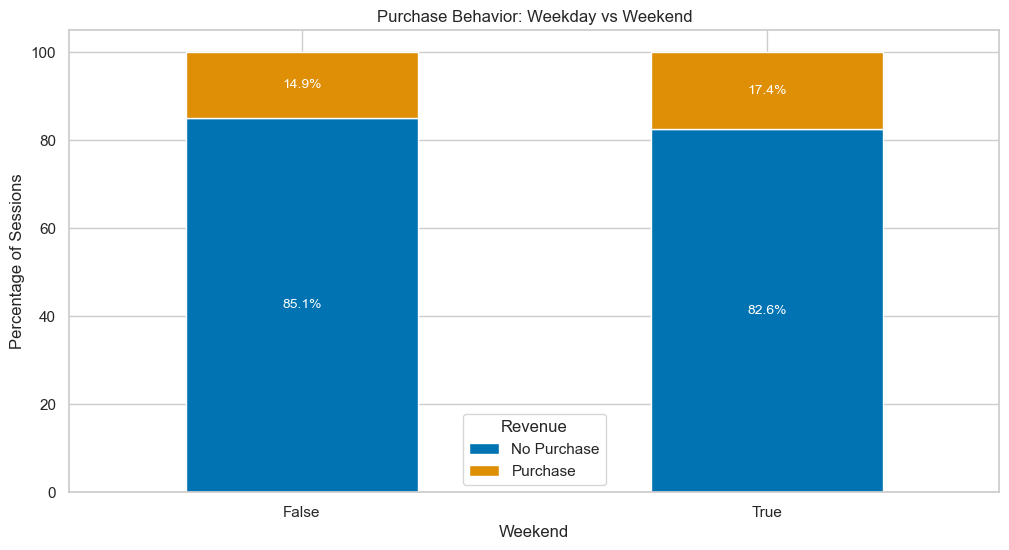

In [31]:
# Weekend vs Revenue
weekend_ct = pd.crosstab(df1['Weekend'], df1['Revenue'])
weekend_pct = weekend_ct.div(weekend_ct.sum(1), axis=0) * 100

ax = weekend_pct.plot(kind='bar', stacked=True, figsize = (12, 6), legend=True)
plt.title('Purchase Behavior: Weekday vs Weekend')
plt.xlabel('Weekend')
plt.ylabel('Percentage of Sessions')
plt.xticks(rotation=0)

# Annotate bars with percentages
for i, row in enumerate(weekend_pct.values):
    for j, val in enumerate(row):
        ax.text(i, row[:j].sum() + val/2, f'{val:.1f}%', ha='center', va='center', color='white', fontsize=10)

plt.legend(title='Revenue', labels=['No Purchase','Purchase']);

<Figure size 1000x600 with 0 Axes>

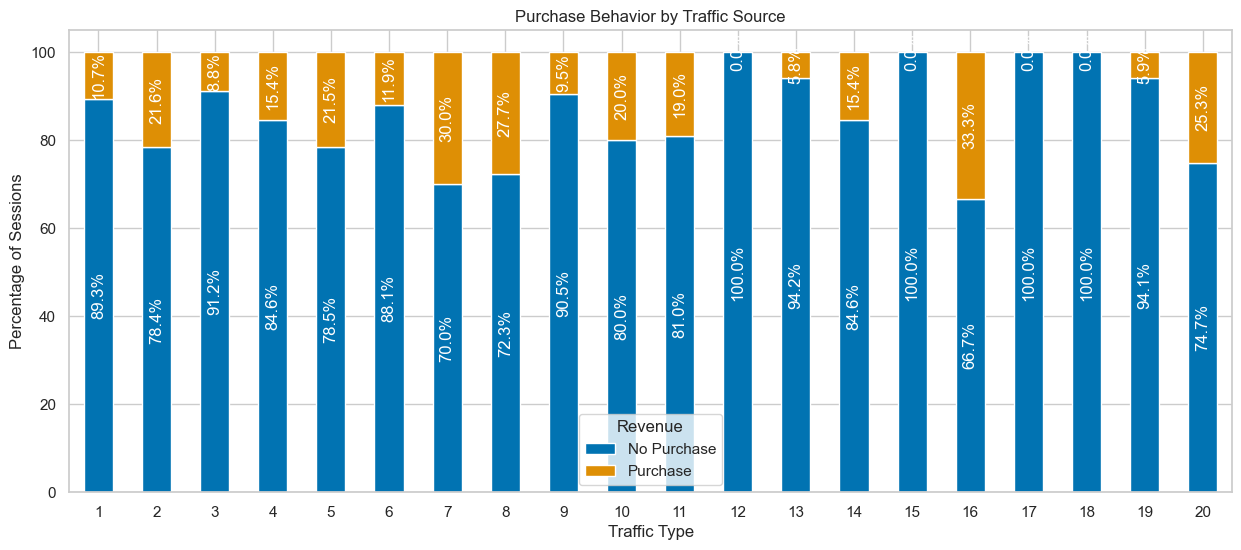

In [32]:
# Traffic Type vs Revenue
traffic_ct = pd.crosstab(df['TrafficType'], df['Revenue'])
traffic_pct = traffic_ct.div(traffic_ct.sum(1), axis=0) * 100

plt.figure(figsize=(10,6))
ax = traffic_pct.plot(kind='bar', stacked=True, figsize = (15, 6), legend=True)
plt.title('Purchase Behavior by Traffic Source')
plt.xlabel('Traffic Type')
plt.ylabel('Percentage of Sessions')
plt.xticks(rotation=0)

for i, row in enumerate(traffic_pct.values):
    for j, val in enumerate(row):
        ax.text(i, row[:j].sum() + val/2, f'{val:.1f}%', ha='center', va='center', color='white', rotation=90)

plt.legend(title='Revenue', labels=['No Purchase','Purchase']);

Different traffic sources show varying purchase behaviors. Certain channels (e.g., categories 2, 5, 7, 8, 10, 16, 20) are moderately associated with higher conversion rates, suggesting these sources are more effective at driving purchases.

<Figure size 800x500 with 0 Axes>

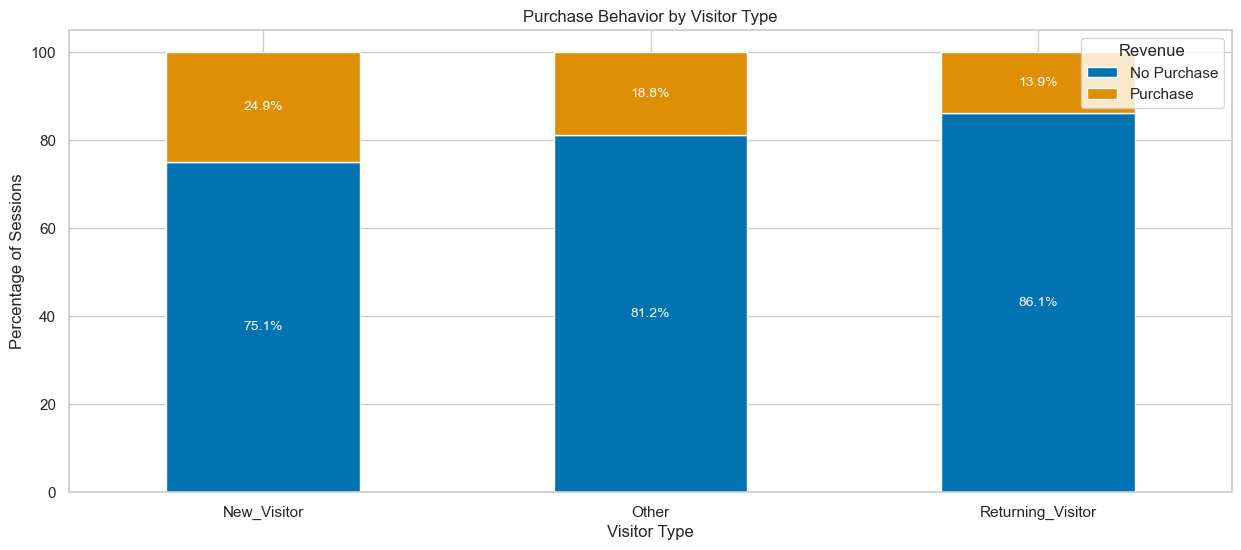

In [33]:
# Visitor Type vs Revenue
visitor_ct = pd.crosstab(df['VisitorType'], df['Revenue'])
visitor_pct = visitor_ct.div(visitor_ct.sum(1), axis=0) * 100

plt.figure(figsize=(8,5))
ax = visitor_pct.plot(kind='bar', stacked=True, figsize = (15, 6), legend=True)
plt.title('Purchase Behavior by Visitor Type')
plt.xlabel('Visitor Type')
plt.ylabel('Percentage of Sessions')
plt.xticks(rotation=0)

for i, row in enumerate(visitor_pct.values):
    for j, val in enumerate(row):
        ax.text(i, row[:j].sum() + val/2, f'{val:.1f}%', ha='center', va='center', color='white', fontsize=10)

plt.legend(title='Revenue', labels=['No Purchase','Purchase']);

<Figure size 1000x600 with 0 Axes>

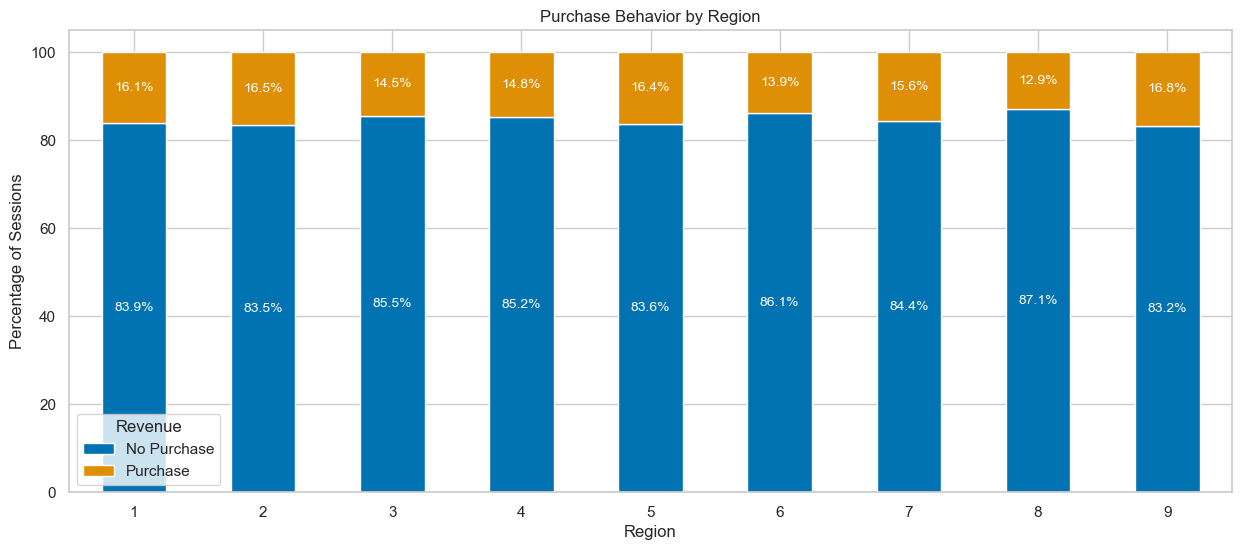

In [34]:
# Region vs Revenue
region_ct = pd.crosstab(df['Region'], df['Revenue'])
region_pct = region_ct.div(region_ct.sum(1), axis=0) * 100

plt.figure(figsize=(10,6))
ax = region_pct.plot(kind='bar', stacked=True, figsize = (15, 6), legend=True)
plt.title('Purchase Behavior by Region')
plt.xlabel('Region')
plt.ylabel('Percentage of Sessions')
plt.xticks(rotation=0)

for i, row in enumerate(region_pct.values):
    for j, val in enumerate(row):
        ax.text(i, row[:j].sum() + val/2, f'{val:.1f}%', ha='center', va='center', color='white', fontsize=10)

plt.legend(title='Revenue', labels=['No Purchase','Purchase']);

### Correlation

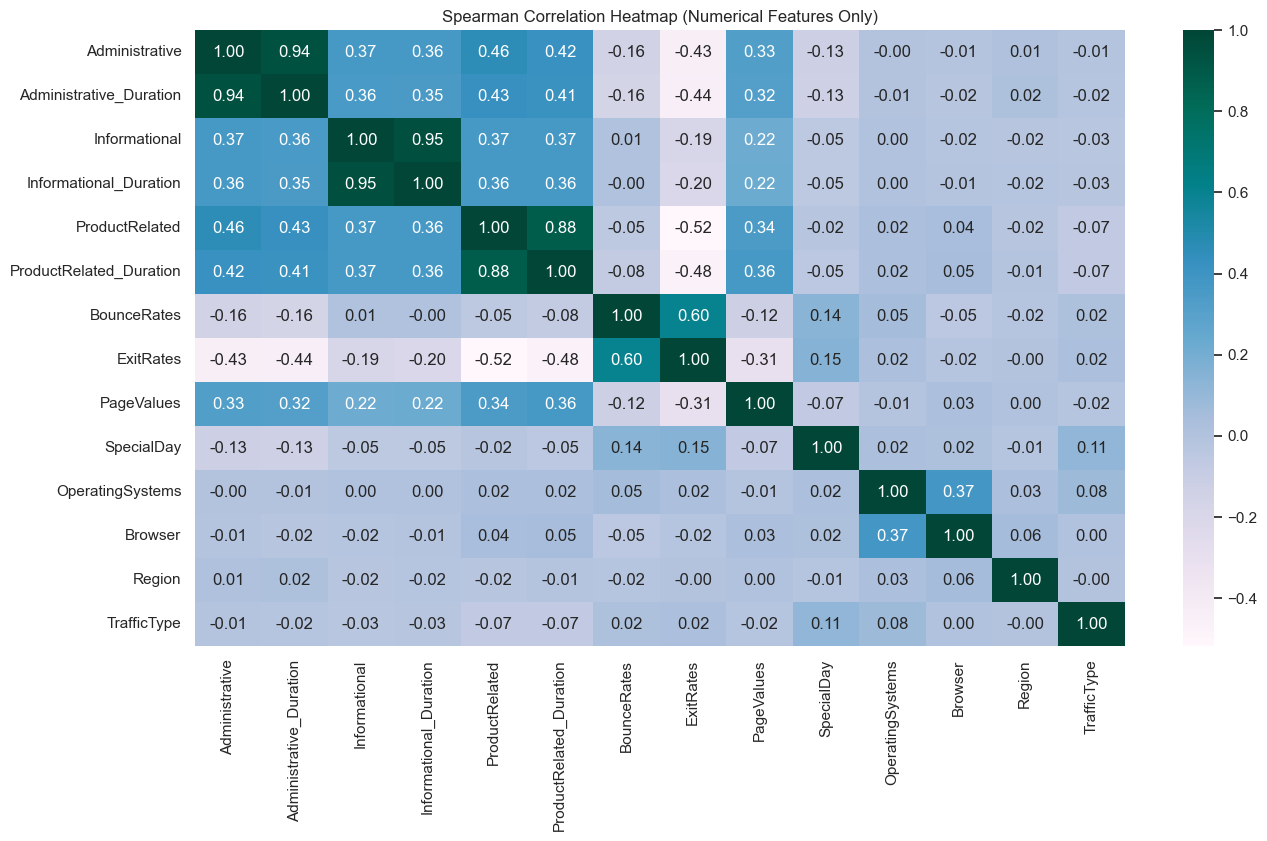

In [35]:
# Correlation plot
""" Since our numerical features are not normally distributed, we will use non-parametric correlation methods (such as Spearman) rather than Pearson. """

def plot_spearman_corr_heatmap(data, figsize=(15, 8), cmap='PuBuGn'):
    """
    Plots a Spearman correlation heatmap for numerical features in a DataFrame.
    
    Parameters
    ----------
    data : pandas.DataFrame
        Input dataframe.
    figsize : tuple, optional (default=(15,8))
        Figure size for the heatmap.
    cmap : str, optional (default='PuBuGn')
        Colormap for the heatmap.
    """
    # Select only numerical columns
    numeric_df = data.select_dtypes(include=['number'])
    
    # Compute Spearman correlation
    corr = numeric_df.corr(method="spearman")
    
    # Plot
    plt.figure(figsize=figsize)
    sns.heatmap(corr, annot=True, cmap=cmap, fmt=".2f", cbar=True)
    plt.title("Spearman Correlation Heatmap (Numerical Features Only)")
    plt.show()




plot_spearman_corr_heatmap(df1)

- Administrative <-> Administrative_Duration ($r \approx 0.94$ ): Very strong correlation; more actions almost always mean more time spent, indicating redundancy.
- Informational <-> Informational_Duration ($r \approx 0.95$): Very strong correlation; higher visits nearly always align with longer durations, suggesting overlap.
- ProductRelated <-> ProductRelated_Duration ($r \approx 0.88$): Strong correlation; extensive browsing strongly aligns with more time spent, possibly signaling purchase intent but also redundancy.
- ExitRates <-> BounceRates ($r \approx 0.60$): Moderate correlation; both reflect leaving behavior, though they capture it differently, so partial overlap exists.

## Multi-variate Analysis

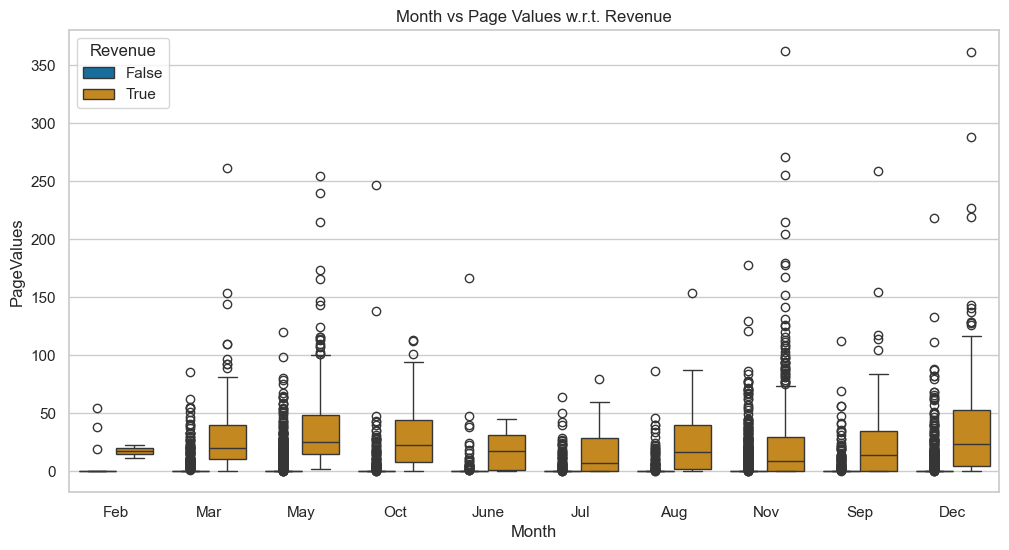

In [36]:
# month vs pagevalues w.r.t. revenue
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='PageValues', hue='Revenue', data=df1)
plt.title('Month vs Page Values w.r.t. Revenue');

- Page Values vary irregularly across months in purchase sessions, suggesting that user spending behavior does not follow a consistent seasonal pattern.
- The presence of many outliers indicates that certain months drive exceptionally high transaction values, which could reflect successful campaigns or seasonal spikes.

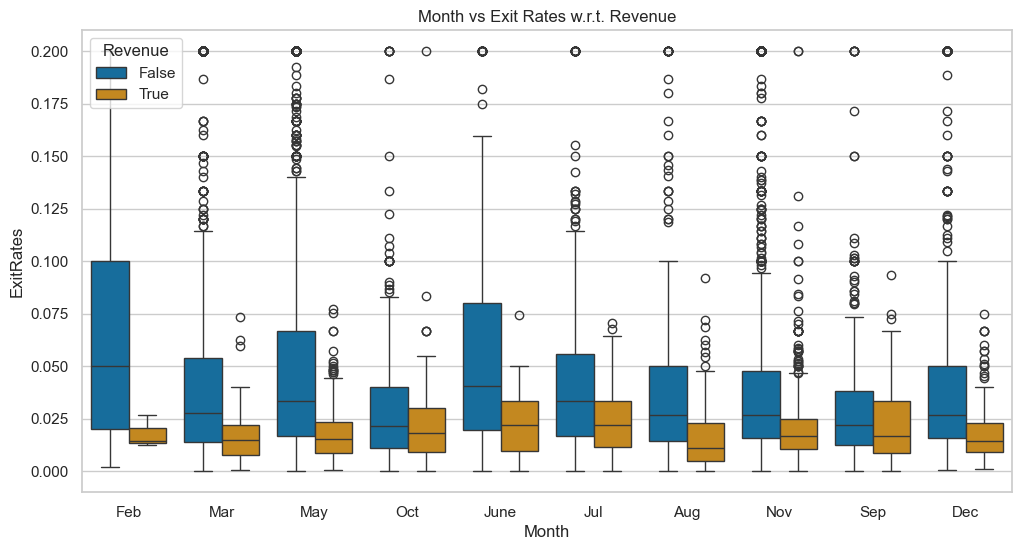

In [37]:
# Month vs ExitRates w.r.t. Revenue
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='ExitRates', hue='Revenue', data=df1)
plt.title('Month vs Exit Rates w.r.t. Revenue');

- Exit rates across months appear roughly symmetric for both purchase and non-purchase sessions, suggesting moderately consistent user behavior throughout the year.
- However, the presence of numerous outliers indicates that certain months experience unusually high exit rates, highlighting potential areas for improving page engagement.

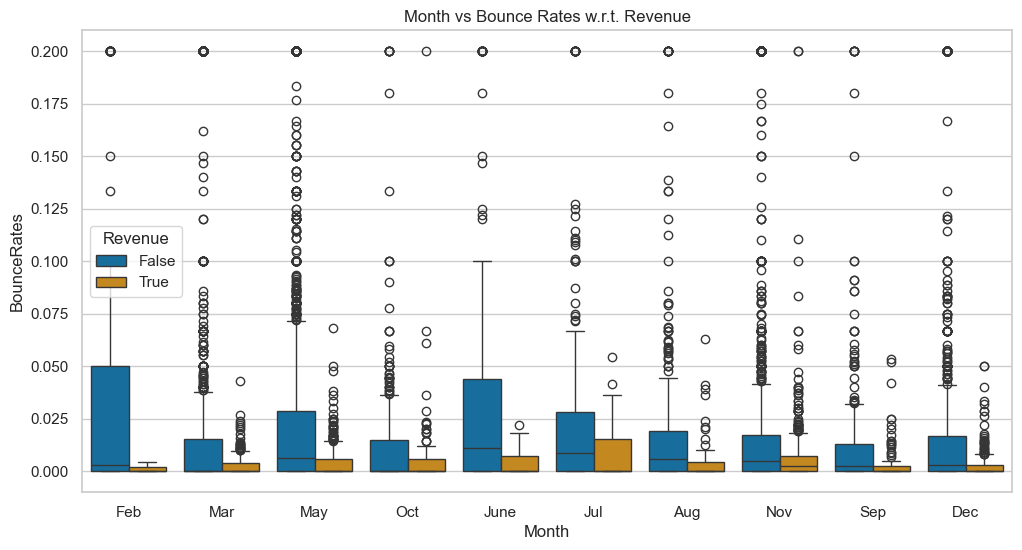

In [38]:
# Month vs BounceRates w.r.t. Revenue
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='BounceRates', hue='Revenue', data=df1)
plt.title('Month vs Bounce Rates w.r.t. Revenue');

- Bounce rates vary irregularly across months for both purchase and non-purchase sessions, indicating non-normal behavior.
- Several extreme values (outliers) suggest that certain months or pages experience unusually high bounce rates, highlighting potential opportunities to improve user engagement.

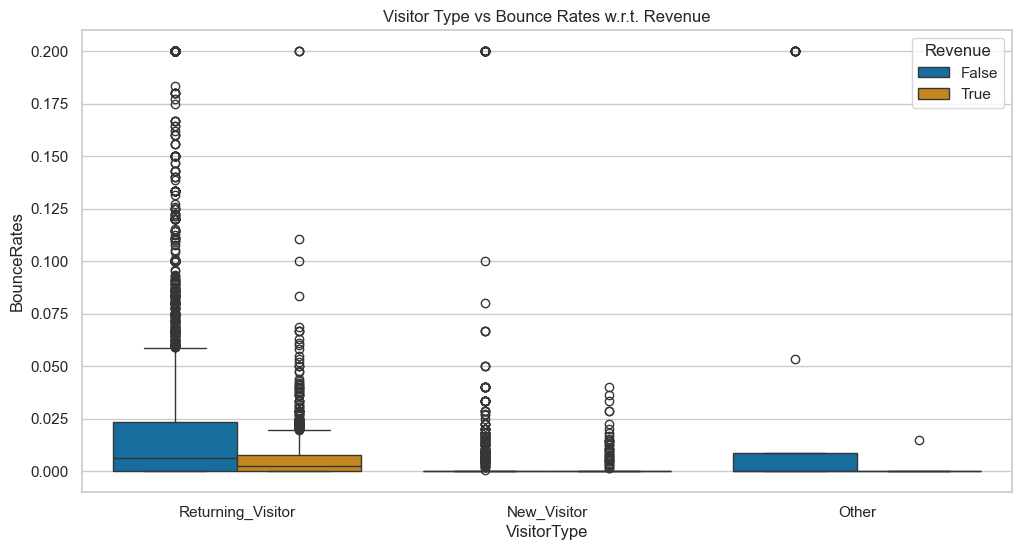

In [39]:
# VisitorType vs BounceRates w.r.t. Revenue
plt.figure(figsize=(12, 6))
sns.boxplot(x='VisitorType', y='BounceRates', hue='Revenue', data=df1)
plt.title('Visitor Type vs Bounce Rates w.r.t. Revenue');

- Bounce rates vary significantly across visitor types for both purchase and non-purchase sessions, indicating irregular user engagement patterns.
- A number of outliers suggest that certain visitor types experience unusually high bounce rates, highlighting potential areas for improving page flow or engagement.

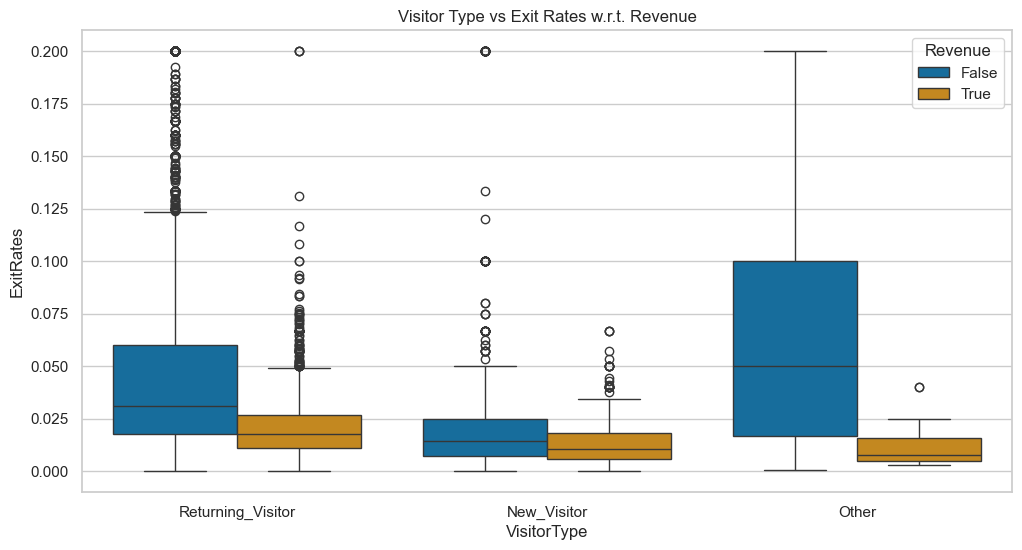

In [40]:
# VisitorType vs ExitRates w.r.t. Revenue
plt.figure(figsize=(12, 6))
sns.boxplot(x='VisitorType', y='ExitRates', hue='Revenue', data=df1)
plt.title('Visitor Type vs Exit Rates w.r.t. Revenue');

- Exit rates vary widely across visitor types for both purchase and non-purchase sessions, indicating that user exit behavior is irregular and does not follow a typical (Gaussian) distribution.
- The presence of numerous outliers suggests that certain visitor segments experience unusually high exit rates, highlighting opportunities to optimize pages and reduce drop-offs.

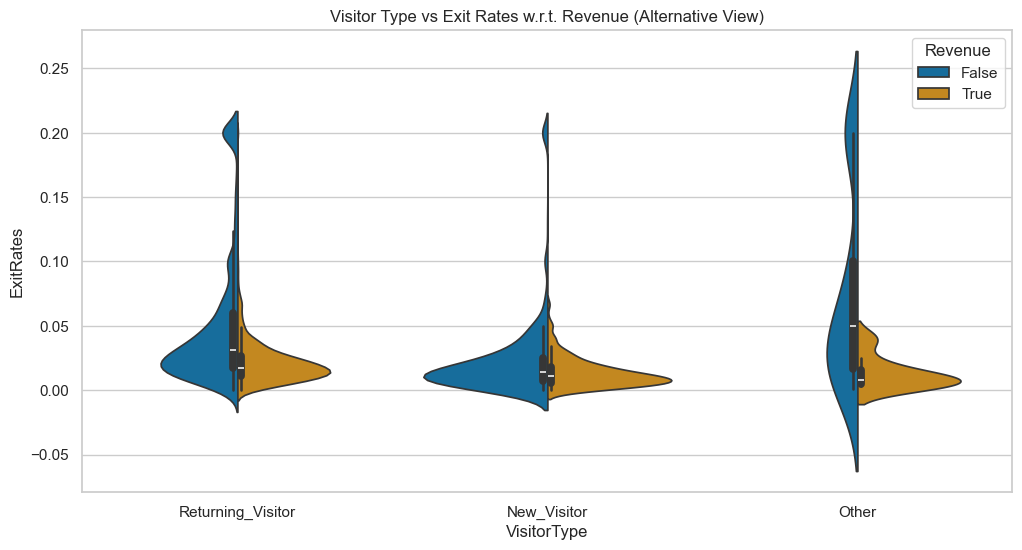

In [41]:
# VisitorType vs ExitRates w.r.t. Revenue
plt.figure(figsize=(12, 6))
sns.violinplot(x='VisitorType', y='ExitRates', hue='Revenue', data=df1, split=True)
plt.title('Visitor Type vs Exit Rates w.r.t. Revenue (Alternative View)');

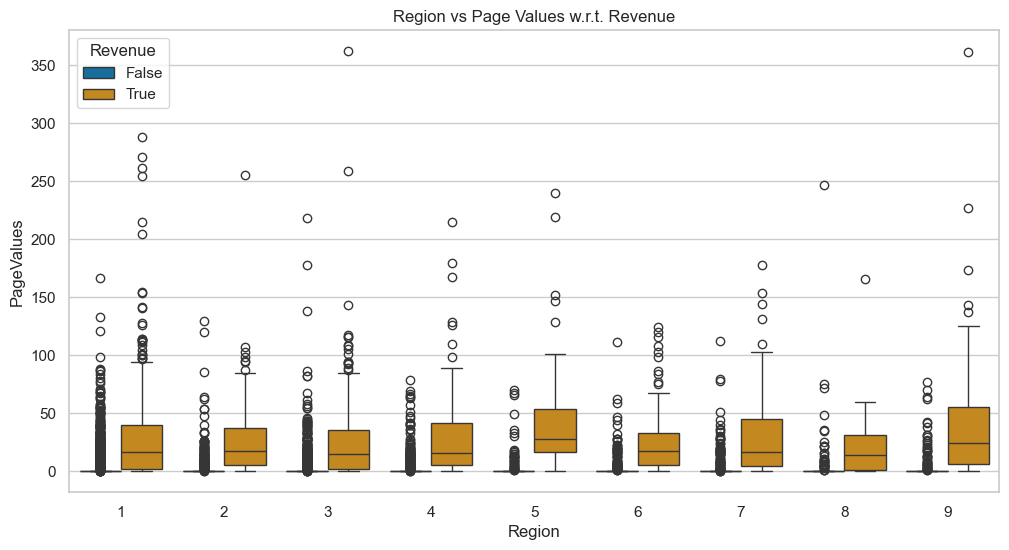

In [42]:
# Region vs PageValues w.r.t. Revenue
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='PageValues', hue='Revenue', data=df1)
plt.title('Region vs Page Values w.r.t. Revenue');

- Page Values vary significantly across regions for purchase sessions, indicating that transaction amounts are not normally distributed.
- Several outliers suggest that certain regions generate exceptionally high transaction values, highlighting potential high-revenue markets to target.

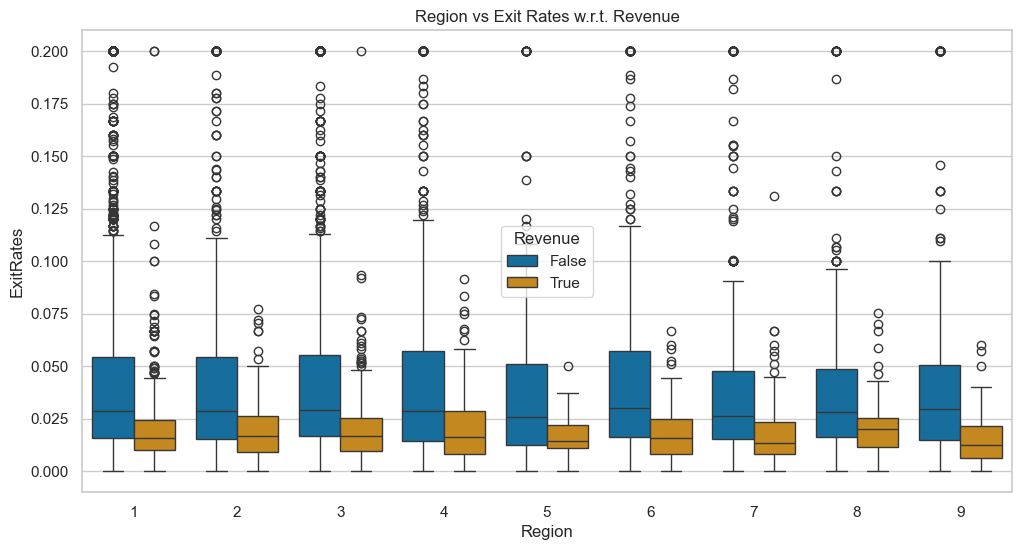

In [43]:
# Region vs ExitRates w.r.t. Revenue
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='ExitRates', hue='Revenue', data=df1)
plt.title('Region vs Exit Rates w.r.t. Revenue');

- Exit rates vary widely across regions for both purchase and non-purchase sessions, indicating that user exit behavior is not consistent or normally distributed.
- The presence of many outliers suggests that certain regions experience unusually high or low exit rates, highlighting potential areas for targeted optimization.

### Variance Inflation Factor (VIF)

- VIF < 5 : Low multicollinearity (generally acceptable)
- VIF between 5 and 10 : Moderate multicollinearity; the variable is likely correlated with others.
- VIF > 10 : High multicollinearity; the variable is highly correlated with others and should usually be removed.

In [44]:
# https://etav.github.io/python/vif_factor_python.html

# Calculate VIF for numerical features : requires no missing values

def calculate_vif(df):
    """
    Calculate VIF for all numerical features in the dataframe.
    
    Parameters:
    - df: pandas DataFrame with numerical features
    
    Returns:
    - DataFrame with columns ['Feature', 'VIF']
    """
    # numeric_df = df.select_dtypes(include=['number']).copy()
    numeric_df = df.select_dtypes(include=['number']).dropna()
    
    vif_data = pd.DataFrame()
    vif_data['Feature'] = numeric_df.columns
    vif_data['VIF'] = [variance_inflation_factor(numeric_df.values, i)
                       for i in range(numeric_df.shape[1])]
    
    vif_data = vif_data.sort_values(by='VIF', ascending=False).reset_index(drop=True)
    return vif_data


# Drop features with VIF above a threshold
def drop_high_vif_features(df, threshold=10.0):
    """
    Iteratively removes numerical features with high Variance Inflation Factor (VIF).

    Parameters:
    ----------
    df : pandas.DataFrame
    threshold : float, default=10.0
        
    Returns:
    -------
    df_numeric : pandas.DataFrame
    final_vif : pandas.DataFrame
    """

    # Select only numerical columns and create a copy (avoids modifying the original DataFrame)
    # df_numeric = df.select_dtypes(include=['number']).copy()
    df_numeric = df.select_dtypes(include=['number']).dropna()

    # Continue eliminating features until all VIFs are below the threshold
    while True:

        # Safety check:
        # VIF is not meaningful when only one feature remains
        if df_numeric.shape[1] <= 1:
            break

        # Compute VIF values for the current set of features
        vif_df = calculate_vif(df_numeric)

        # Identify the highest VIF value
        max_vif = vif_df['VIF'].max()

        # Stop if all VIF values are within the acceptable threshold
        if max_vif < threshold:
            break

        # Select the feature with the highest VIF
        feature_to_drop = vif_df.loc[vif_df['VIF'].idxmax(), 'Feature']

        # Inform the user which feature is being removed and why
        print(f"Dropping '{feature_to_drop}' with VIF = {max_vif:.2f}")

        # Remove the highly collinear feature
        df_numeric = df_numeric.drop(columns=[feature_to_drop])

    # Compute final VIF values after feature removal
    final_vif = calculate_vif(df_numeric)

    # Return the reduced feature set and corresponding VIFs
    return df_numeric, final_vif


In [45]:
# Calculate initial VIF
vif_initial = calculate_vif(df)
vif_initial

,Feature,VIF
0,ExitRates,9.793889
1,BounceRates,6.786104
2,ProductRelated,6.503765
3,ProductRelated_Duration,6.012914
4,OperatingSystems,4.971363
5,Browser,2.954500
6,Administrative,2.793449
7,Region,2.490484
8,Informational,2.115489
9,TrafficType,2.096889


## Statistical Tests

### Relationship between categorical/boolean variables and a boolean target (Revenue)

- **Goal:** Test if a variable is associated with Revenue.
- **Test:** Chi-square test of independence
    - *Null hypothesis ($H_0$):* Variable is independent of Revenue.
    - *Alternative hypothesis ($H_1$):* Variable is not independent of Revenue (there is an association).
- *Example: Does Weekend affect Revenue ?*

### <u>Chi-square tests</u> : categorical/boolean features vs target features

In [46]:
# Copy df to avoid modifying original
df_test = df.copy()

# List of categorical/boolean features (excluding target)
cat_bool_cols = ['Month', 'VisitorType', 'Weekend']  
target = 'Revenue'

# Function to merge rare categories
def merge_rare_categories(series, threshold=0.05):
    counts = series.value_counts(normalize=True)
    rare = counts[counts < threshold].index
    return series.apply(lambda x: 'Other' if x in rare else x)

print("Chi-square test results : categorical/boolean features vs Revenue\n")

for col in cat_bool_cols:
    # Merge rare categories
    df_test[col] = merge_rare_categories(df_test[col], threshold=0.05)
    
    # Create contingency table
    contingency = pd.crosstab(df_test[col], df_test[target])
    
    # Perform Chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency)
    
    print(f"Feature: {col}")
    # print(contingency)
    print(f"Chi2 = {chi2:.2f}, p = {p:.4f}, Degrees of freedom (dof) = {dof}")
    if p < 0.05:
        print(f"'{col}' has significant association with Revenue.\n")
    else:
        print(f"'{col}' has no significant association with Revenue.\n")


print('-' * 60)
print("Categorical variables are related ?")
print('-' * 60)

contingency_cat = pd.crosstab(df_test["Month"], df_test["VisitorType"])
chi2_cat, p_cat, dof_cat, expected_cat = chi2_contingency(contingency_cat)
print(f"Chi2 = {chi2_cat:.2f}, p = {p_cat:.4f}, Degrees of freedom (dof) = {dof_cat}")

if p < 0.05:
    print("'Month' has significant association with VisitorType.\n")
else:
    print("'Month' has no significant association with VisitorType.\n")

Chi-square test results : categorical/boolean features vs Revenue

Feature: Month
Chi2 = 333.41, p = 0.0000, Degrees of freedom (dof) = 4
'Month' has significant association with Revenue.

Feature: VisitorType
Chi2 = 135.25, p = 0.0000, Degrees of freedom (dof) = 2
'VisitorType' has significant association with Revenue.

Feature: Weekend
Chi2 = 10.39, p = 0.0013, Degrees of freedom (dof) = 1
'Weekend' has significant association with Revenue.

------------------------------------------------------------
Categorical variables are related ?
------------------------------------------------------------
Chi2 = 391.07, p = 0.0000, Degrees of freedom (dof) = 8
'Month' has significant association with VisitorType.



- All three features (Month, VisitorType, Weekend) show a significant association (p < 0.05) with Revenue.
- The likelihood of a visitor making a purchase depends on the month, type of visitor, and whether it is a weekend.

### <u>Mann–Whitney U Test (2 groups)</u> : Numerical vs Boolean (Revenue, Weekend)

We applied the Mann–Whitney U test to compare `numerical feature` between the two groups of boolean variable, e.g., Revenue.
- *Null hypothesis ($H_0$): The distributions of `feature` are the same in both groups.*
- *Alternative hypothesis ($H_1$): The distributions differ between groups.*

For features with p < 0.05, we reject the null hypothesis and conclude that the distribution of `feature` is significantly different between the two groups.

For features with p ≥ 0.05, there is no evidence of a significant difference between the groups.

In [ ]:
# Mann-Whitney U test for numerical vs boolean (2 groups)
def mann_whitney_test(data, numerical_cols, boolean_col, alpha=0.05):
    """
    Performs Mann–Whitney U test for multiple numerical features against a boolean column.
    
    Returns: DataFrame with statistic, p-value, and significance flag.
    """
    results = []
    for col in numerical_cols:
        group1 = data[data[boolean_col]==True][col].dropna()  # noqa: E712
        group2 = data[data[boolean_col]==False][col].dropna()  # noqa: E712
        stat, p = mannwhitneyu(group1, group2)
        significance = "Significant" if p < alpha else "Not Significant"
        results.append({'Feature': col, 'Mann-Whitney U': stat, 'p-value': f'{p:.4f}', 'Significance': significance})
    return pd.DataFrame(results)

In [48]:
# Mann-Whitney U test: Numerical vs boolean (Revenue)
print("Mann-Whitney U test: Numerical vs boolean (Revenue)\n")
mw_results = mann_whitney_test(df1, numerical_features, 'Revenue')
print(mw_results)

Mann-Whitney U test: Numerical vs boolean (Revenue)

                    Feature  Mann-Whitney U p-value     Significance
0            Administrative      12464040.5  0.0000      Significant
1   Administrative_Duration      12398061.0  0.0000      Significant
2             Informational      11236434.0  0.0000      Significant
3    Informational_Duration      11173527.0  0.0000      Significant
4            ProductRelated      13093049.0  0.0000      Significant
5   ProductRelated_Duration      13382713.0  0.0000      Significant
6               BounceRates       7686683.0  0.0000      Significant
7                 ExitRates       5903869.0  0.0000      Significant
8                PageValues      17166757.0  0.0000      Significant
9                SpecialDay       9220133.0  0.0000      Significant
10         OperatingSystems       9547773.0  0.0024      Significant
11                  Browser      10161619.5  0.0715  Not Significant
12                   Region       9715922.0  0.100

In [49]:
# Mann-Whitney U test: Numerical vs boolean (Weekend)
print("Mann-Whitney U test: Numerical vs boolean (Weekend)\n")
mw_results = mann_whitney_test(df1, numerical_features, 'Weekend')
print(mw_results)

Mann-Whitney U test: Numerical vs boolean (Weekend)

                    Feature  Mann-Whitney U p-value     Significance
0            Administrative      14261757.0  0.0000      Significant
1   Administrative_Duration      14312909.0  0.0000      Significant
2             Informational      14140549.0  0.0000      Significant
3    Informational_Duration      14162110.5  0.0000      Significant
4            ProductRelated      14205599.5  0.0001      Significant
5   ProductRelated_Duration      14075835.5  0.0024      Significant
6               BounceRates      12999531.0  0.0004      Significant
7                 ExitRates      12314520.0  0.0000      Significant
8                PageValues      13847343.0  0.0216      Significant
9                SpecialDay      12847297.0  0.0000      Significant
10         OperatingSystems      13680133.5  0.4627  Not Significant
11                  Browser      12575531.5  0.0000      Significant
12                   Region      13687434.5  0.460

- For Revenue: Most numerical features are significantly different between Revenue (True and False). Features like Browser, Region, and TrafficType are not significant.
- For Weekend: Similarly, most features show significant differences between Weekend (True and False), while OperatingSystems, Region, and TrafficType are not significant.
- Visitors behavior metrics differ significantly depending on whether they make a purchase or visit on a weekend.

### <u>Kruskal–Wallis H test (>2 groups)</u> : Numerical vs Categorical (Month, VisitorType)

We applied the Kruskal–Wallis H test to compare `numerical feature` across the groups of categorical variable.
- *Null hypothesis ($H_0$): The distributions of `feature` are identical across all groups.*
- *Alternative hypothesis ($H_1$): At least one group has a different distribution.*

For features with p < 0.05, we reject the null hypothesis, indicating a statistically significant difference in `feature` distributions among the groups.

For features with p ≥ 0.05, there is no evidence of a significant difference across the groups.

In [50]:
# Kruskal–Wallis test for numerical vs categorical (>2 groups)
def kruskal_wallis_test(df, numerical_cols, categorical_col, alpha=0.05):
    """
    Performs Kruskal–Wallis H test for multiple numerical features against a categorical column (>2 groups).
    
    Returns: DataFrame with statistic, p-value, and significance flag.
    """
    results = []
    for col in numerical_cols:
        groups = [df[df[categorical_col]==cat][col].dropna() for cat in df[categorical_col].unique()]
        stat, p = kruskal(*groups)
        significance = "Significant" if p < alpha else "Not Significant"
        results.append({'Feature': col, 'Kruskal-Wallis H': stat, 'p-value': f'{p:.4f}', 'Significance': significance})
    return pd.DataFrame(results)

In [51]:
# Kruskal-Wallis test: Numerical vs categorical (Month)
print("Kruskal-Wallis test: Numerical vs categorical (Month)\n")
kw_results = kruskal_wallis_test(df1, numerical_features, 'Month')
print(kw_results)

Kruskal-Wallis test: Numerical vs categorical (Month)

                    Feature  Kruskal-Wallis H p-value Significance
0            Administrative        438.994853  0.0000  Significant
1   Administrative_Duration        446.025079  0.0000  Significant
2             Informational         99.589804  0.0000  Significant
3    Informational_Duration         82.798574  0.0000  Significant
4            ProductRelated        508.397226  0.0000  Significant
5   ProductRelated_Duration        427.629004  0.0000  Significant
6               BounceRates        202.126724  0.0000  Significant
7                 ExitRates        258.959706  0.0000  Significant
8                PageValues        156.192715  0.0000  Significant
9                SpecialDay       3444.011709  0.0000  Significant
10         OperatingSystems         22.638658  0.0071  Significant
11                  Browser         38.968618  0.0000  Significant
12                   Region         49.052058  0.0000  Significant
13     

In [52]:
# Kruskal-Wallis test: Numerical vs categorical (VisitorType)
print("Kruskal-Wallis test: Numerical vs categorical (VisitorType)\n")
kw_results = kruskal_wallis_test(df1, numerical_features, 'VisitorType')
print(kw_results)

Kruskal-Wallis test: Numerical vs categorical (VisitorType)

                    Feature  Kruskal-Wallis H p-value Significance
0            Administrative        136.923053  0.0000  Significant
1   Administrative_Duration        189.803727  0.0000  Significant
2             Informational         45.158171  0.0000  Significant
3    Informational_Duration         37.470464  0.0000  Significant
4            ProductRelated        225.746360  0.0000  Significant
5   ProductRelated_Duration        184.516095  0.0000  Significant
6               BounceRates       1153.823911  0.0000  Significant
7                 ExitRates        959.481265  0.0000  Significant
8                PageValues          7.251719  0.0266  Significant
9                SpecialDay        109.195626  0.0000  Significant
10         OperatingSystems        145.566436  0.0000  Significant
11                  Browser        139.143351  0.0000  Significant
12                   Region        112.840633  0.0000  Significant
1

- Across months, all numerical features are significantly different (p < 0.05), indicating that visitor behavior changes depending on the month.
- Seasonal patterns affect metrics like page visits, duration, bounce rates, and product interactions.

#### <u>Conclusion</u>

- **Visitor behavior is significantly associated with both categorical and numerical features.**
- **Revenue is influenced by multiple factors: month, visitor type, weekend visits, and numerical behavior metrics.**
- Feature selection for modeling: Most features are statistically relevant and could be predictive of Revenue. Rare non-significant features (e.g., `Region, TrafficType`) may have `limited predictive power`.

## Outlier Detection

In [62]:
numerical_features_true = [
    'Administrative_Duration',
    'Informational_Duration',
    'ProductRelated_Duration',
    'BounceRates',
    'ExitRates',
    'PageValues'
]

In [63]:
def outlier_percentage_iqr(df, numerical_features_true):

    results = []

    for col in numerical_features_true:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        outlier_count = outliers.shape[0]
        total_count = df[col].count()
        outlier_pct = (outlier_count / total_count) * 100

        results.append({
            'feature': col,
            'outlier_count': outlier_count,
            'total_count': total_count,
            'outlier_percentage': round(outlier_pct, 2)
        })

    return pd.DataFrame(results).sort_values(
        by='outlier_percentage', ascending=False
    ).reset_index(drop=True)


In [65]:
outlier_summary = outlier_percentage_iqr(df1, numerical_features_true)
outlier_summary

,feature,outlier_count,total_count,outlier_percentage
0,PageValues,2730,12330,22.14
1,Informational_Duration,2405,12330,19.51
2,BounceRates,1551,12330,12.58
3,Administrative_Duration,1172,12330,9.51
4,ExitRates,1099,12330,8.91
5,ProductRelated_Duration,961,12330,7.79


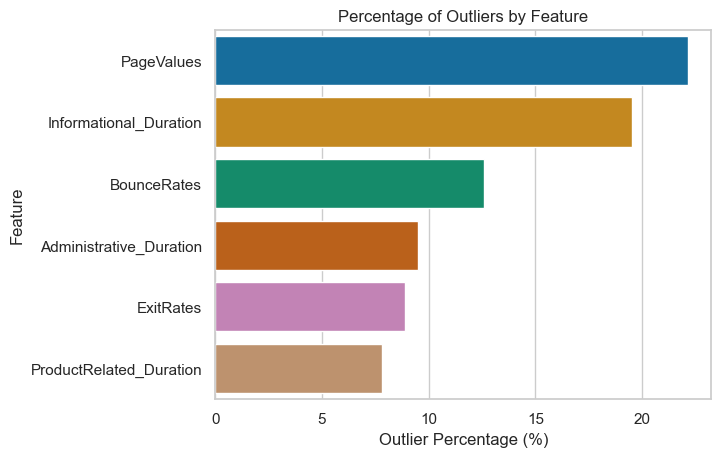

In [67]:
sns.barplot(
    y=outlier_summary['feature'],
    x=outlier_summary['outlier_percentage'],
    hue=outlier_summary['feature'], 
    legend=False
)

plt.title('Percentage of Outliers by Feature')
plt.ylabel('Feature')
plt.xlabel('Outlier Percentage (%)');

# Data Preprocessing

In [3]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

from imblearn.pipeline import Pipeline

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

from imblearn.over_sampling import SMOTE

In [4]:
# Separate clickstream (X_click) and session features (X_session)
df2 = df.copy()
X = df2.drop(columns=['Revenue'])
y = df2['Revenue']

In [5]:
# Separate numerical, categorical and boolean features
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = X.select_dtypes(include=["object"]).columns
bool_cols = X.select_dtypes(include=["bool"]).columns.drop("Revenue", errors="ignore")

In [6]:
class BooleanEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.astype(int).values  # True→1, False→0

In [7]:
# # Fit encoder on the full target
# le = LabelEncoder()
# y_encoded = le.fit_transform(y)  

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=25)

**What MRMR actually does (in simple terms)**

MRMR = Minimum Redundancy Maximum Relevance 
- Redundancy → features that are too similar to each other
    - ✔ correlation or mutual information 
- Relevance → features highly related to the target
    - ✔ F-statistic, mutual information or importance derived from random forests

[https://feature-engine.trainindata.com/en/1.8.x/user_guide/selection/MRMR.html](https://feature-engine.trainindata.com/en/1.8.x/user_guide/selection/MRMR.html)

In [8]:
class MRMRSelector(BaseEstimator, TransformerMixin):
    """
    MRMR feature selector (Difference form):
        score = relevance - mean_redundancy

    - Relevance: MI(feature, target)
    - Redundancy: MI(feature, selected_features)
    """

    def __init__(self, n_features=17, random_state=25):
        self.n_features = n_features
        self.random_state = random_state

    def fit(self, X, y):
        X = pd.DataFrame(X)
        y = np.asarray(y)

        features = X.columns.tolist()
        selected = []

        # ---------------------------------------------------------
        # STEP 1: Determine relevance of all features
        # ---------------------------------------------------------
        relevance = mutual_info_classif(
            X, y, random_state=self.random_state
        )
        relevance = pd.Series(relevance, index=features)

        # ---------------------------------------------------------
        # STEP 1 (continued): Select feature with highest relevance
        # ---------------------------------------------------------
        first_feature = relevance.idxmax()
        selected.append(first_feature)

        remaining = set(features)
        remaining.remove(first_feature)

        # ---------------------------------------------------------
        # STEPS 2–6: Iterative MRMR selection
        # ---------------------------------------------------------
        while len(selected) < self.n_features and remaining:

            scores = {}

            for feature in remaining:
                # -------------------------------------------------
                # STEP 2: Compute redundancy with already selected
                # -------------------------------------------------
                redundancy_values = []

                for sel in selected:
                    # MI(feature, selected_feature)
                    mi_fs = mutual_info_regression(
                        X[[feature]],
                        X[sel],
                        random_state=self.random_state
                    )[0]
                    redundancy_values.append(mi_fs)

                # -------------------------------------------------
                # STEP 4: Mean redundancy with selected features
                # -------------------------------------------------
                mean_redundancy = np.mean(redundancy_values)

                # -------------------------------------------------
                # STEP 3 & 5: MRMR score (difference form)
                # -------------------------------------------------
                score = relevance[feature] - mean_redundancy
                scores[feature] = score

            # -----------------------------------------------------
            # STEP 3 & 5 (continued): Select best-scoring feature
            # -----------------------------------------------------
            best_feature = max(scores, key=scores.get)
            selected.append(best_feature)
            remaining.remove(best_feature)

        self.selected_features_ = selected
        return self

    def transform(self, X):
        X = pd.DataFrame(X)
        return X[self.selected_features_].values


In [9]:
# Preprocessor 

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        # ("num", RobustScaler(), numeric_cols),
        ("bool", BooleanEncoder(), bool_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_cols)
    ]
)


# Data Modeling

In [ ]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, classification_report, auc, roc_curve
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_recall_curve
from scipy.stats import randint, uniform, loguniform

In [34]:
# Helper function: find best threshold
def find_best_threshold(model, X_val, y_val):
    """
    Finds threshold that maximizes F1 score on validation data.
    """
    y_proba = model.predict_proba(X_val)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_val, y_proba)
    f1_scores = 2 * (precision * recall) / (precision + recall)  
    best_idx = np.argmax(f1_scores)
    best_thresh = thresholds[best_idx] if best_idx < len(thresholds) else 0.5
    return best_thresh, f1_scores[best_idx]


# plot curve
def plot_roc_curve(y_true, y_prob):

    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")

In [59]:
logr_pipeline = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("mrmr", MRMRSelector(n_features=17)),
        ("smote", SMOTE(random_state=25)), 
        ("model", LogisticRegression(random_state=25))
    ]
)

In [36]:
# Fit on training data ONLY
logr_pipeline.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('mrmr', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('bool', ...), ...]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. 

Logistic Regression Metrics:
Train Accuracy: 85.01%
Test Set: ROC-AUC: 0.8972 | Accuracy: 85.32% | F1 Score: 0.6135 | TPR: 0.7535 | TNR: 0.8714

              precision    recall  f1-score   support

       False       0.95      0.87      0.91      3127
        True       0.52      0.75      0.61       572

    accuracy                           0.85      3699
   macro avg       0.73      0.81      0.76      3699
weighted avg       0.88      0.85      0.86      3699



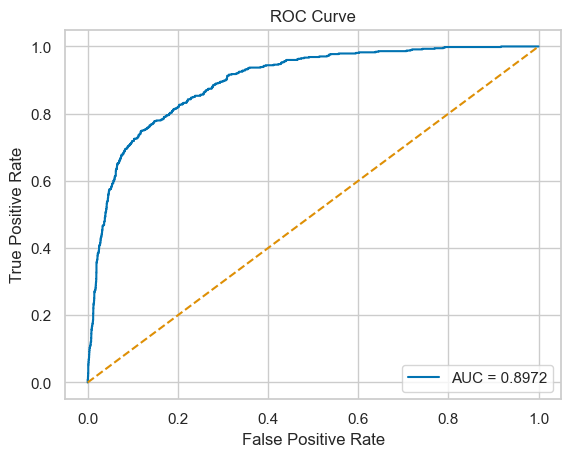

In [37]:
# Prediction on train set
y_pred_train_logr = logr_pipeline.predict(X_train)
train_accuracy_logr = accuracy_score(y_train, y_pred_train_logr) * 100

# Prediction on test set
y_pred_proba_logr = logr_pipeline.predict_proba(X_test)[:, 1]  # ROC-AUC
y_pred_logr = logr_pipeline.predict(X_test)                    # Accuracy / F1 / TPR / TNR

accuracy = accuracy_score(y_test, y_pred_logr) * 100
tpr = recall_score(y_test, y_pred_logr, pos_label=1)
tnr = recall_score(y_test, y_pred_logr, pos_label=0)
f1 = f1_score(y_test, y_pred_logr)
roc_auc = roc_auc_score(y_test, y_pred_proba_logr)

# Display
print("Logistic Regression Metrics:")
print(f"Train Accuracy: {train_accuracy_logr:.2f}%")
print(f"Test Set: ROC-AUC: {roc_auc:.4f} | Accuracy: {accuracy:.2f}% | F1 Score: {f1:.4f} | TPR: {tpr:.4f} | TNR: {tnr:.4f}")
print()
print(classification_report(y_test, y_pred_logr))
plot_roc_curve(y_test, y_pred_proba_logr)

In [60]:
param_distributions = { 
        "model__C": loguniform(1e-4, 1e2),
        "model__max_iter": randint(500, 2000),  
        "model__penalty": ["l2", None],
        "model__class_weight": [None,  "balanced"],
        "model__solver": ["lbfgs", "newton-cholesky"],
        "mrmr__n_features": randint(10, 50)
    }


cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=25)

search_logr = RandomizedSearchCV(
    estimator=logr_pipeline,
    param_distributions=param_distributions,
    n_iter=25,
    scoring="f1",
    cv=cv,
    n_jobs=-1,
    random_state=25,
    verbose=1
)

search_logr.fit(X_train, y_train)

print("Best parameters:", search_logr.best_params_)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best parameters: {'model__C': np.float64(0.0017280002369000403), 'model__class_weight': None, 'model__max_iter': 884, 'model__penalty': 'l2', 'model__solver': 'newton-cholesky', 'mrmr__n_features': 33}


In [61]:
# Numeric and bool features are passed through StandardScaler/BooleanEncoder : keep original names
num_and_bool_features = list(numeric_cols) + list(bool_cols)

# OneHotEncoder feature names
ohe = search_logr.best_estimator_.named_steps["preprocess"].named_transformers_["cat"]
cat_features = list(ohe.get_feature_names_out(categorical_cols))

# Combine all
feature_names = num_and_bool_features + cat_features

selected_features_idx = search_logr.best_estimator_.named_steps["mrmr"].selected_features_
selected_feature_names = [feature_names[i] for i in selected_features_idx]

print("Top selected features:")
selected_feature_names

Top selected features:


['PageValues',
 'Month_Nov',
 'VisitorType_Other',
 'ExitRates',
 'Month_June',
 'Weekend',
 'Month_Oct',
 'Month_Jul',
 'Month_Dec',
 'Month_Aug',
 'Informational_Duration',
 'Month_Feb',
 'Browser',
 'Month_Sep',
 'VisitorType_New_Visitor',
 'ProductRelated_Duration',
 'Region',
 'SpecialDay',
 'Month_Mar',
 'Administrative_Duration',
 'TrafficType',
 'Month_May',
 'OperatingSystems',
 'VisitorType_Returning_Visitor',
 'Informational',
 'BounceRates',
 'Administrative',
 'ProductRelated']

Best threshold=0.61 with F1=0.6589
Logistic Regression Metrics:
Train Accuracy: 88.55%
Test Set: ROC-AUC: 0.8870 | Accuracy: 88.02% | F1 Score: 0.6005 | TPR: 0.5822 | TNR: 0.9348

              precision    recall  f1-score   support

       False       0.92      0.93      0.93      3127
        True       0.62      0.58      0.60       572

    accuracy                           0.88      3699
   macro avg       0.77      0.76      0.77      3699
weighted avg       0.88      0.88      0.88      3699



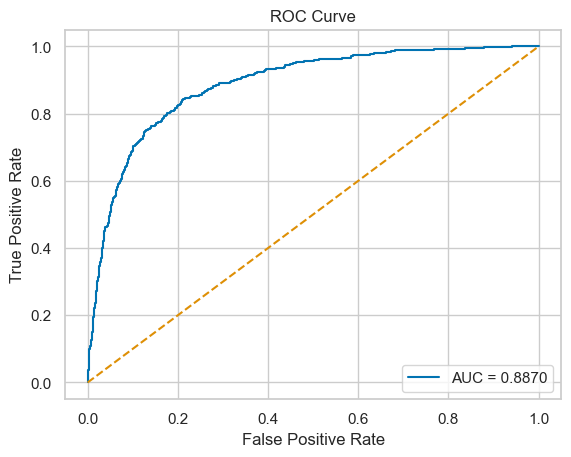

In [62]:
# Final evaluation
best_logr = search_logr.best_estimator_

# Create a holdout validation set for threshold tuning
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, stratify=y_train,
                                            test_size=0.2, random_state=25)

best_logr.fit(X_tr, y_tr)
best_thresh_logr, best_f1_logr = find_best_threshold(best_logr, X_val, y_val)
print(f"Best threshold={best_thresh_logr:.2f} with F1={best_f1_logr:.4f}")

# Prediction on train set
y_pred_train_proba_logr = best_logr.predict_proba(X_train)[:, 1]
y_pred_train_logr = (y_pred_train_proba_logr >= best_thresh_logr).astype(int)
train_accuracy_logr = accuracy_score(y_train, y_pred_train_logr) * 100

# y_pred_proba_logr = best_logr.predict_proba(X_test)[:, 1]
# y_pred_logr = best_logr.predict(X_test)  

# Prediction on test set
y_pred_proba_logr = best_logr.predict_proba(X_test)[:, 1]
y_pred_logr = (y_pred_proba_logr >= best_thresh_logr).astype(int)  

accuracy = accuracy_score(y_test, y_pred_logr) * 100
tpr = recall_score(y_test, y_pred_logr, pos_label=1)
tnr = recall_score(y_test, y_pred_logr, pos_label=0)
f1 = f1_score(y_test, y_pred_logr)
roc_auc = roc_auc_score(y_test, y_pred_proba_logr)

print("Logistic Regression Metrics:")
print(f"Train Accuracy: {train_accuracy_logr:.2f}%")
print(f"Test Set: ROC-AUC: {roc_auc:.4f} | Accuracy: {accuracy:.2f}% | F1 Score: {f1:.4f} | TPR: {tpr:.4f} | TNR: {tnr:.4f}")
print()
print(classification_report(y_test, y_pred_logr))
plot_roc_curve(y_test, y_pred_proba_logr)

# Best threshold=0.70 with F1=0.6784
# Logistic Regression Metrics:
# Train Accuracy: 89.19%
# Test Set: ROC-AUC: 0.8953 | Accuracy: 88.73% | F1 Score: 0.6142 | TPR: 0.5804 | TNR: 0.9434

In [ ]:
#pip install shap

In [ ]:
# import shap

# # --- Get trained model from pipeline ---
# logr_model = logr_pipeline.named_steps["model"]   # change "model" if your step name differs

# # --- Transform training data the same way pipeline does ---
# X_train_transformed = logr_pipeline[:-1].transform(X_train)

# # --- SHAP Explainer ---
# explainer_logr = shap.LinearExplainer(logr_model, X_train_transformed)

# # --- SHAP Values ---
# shap_values_logr = explainer_logr(X_train_transformed)

# # --- Global Importance ---
# shap.summary_plot(shap_values_logr, X_train_transformed)

# # --- Local Explanation (single prediction example) ---
# shap.plots.waterfall(shap_values_logr[0])


### C4.5 Decision Tree

In [48]:
# scikit-learn's DecisionTreeClassifier with criterion="entropy" mimics C4.5
c45_pipeline = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("mrmr", MRMRSelector(n_features=17)),
        ("smote", SMOTE(random_state=25)),
        ("model", DecisionTreeClassifier(random_state=25))
    ]
)

C4.5 - Decision Tree Metrics:
Train Accuracy: 99.99%
Test Set: ROC-AUC: 0.7598 | Accuracy: 84.83% | F1 Score: 0.5634 | TPR: 0.6329 | TNR: 0.8878

              precision    recall  f1-score   support

       False       0.93      0.89      0.91      3127
        True       0.51      0.63      0.56       572

    accuracy                           0.85      3699
   macro avg       0.72      0.76      0.74      3699
weighted avg       0.86      0.85      0.85      3699



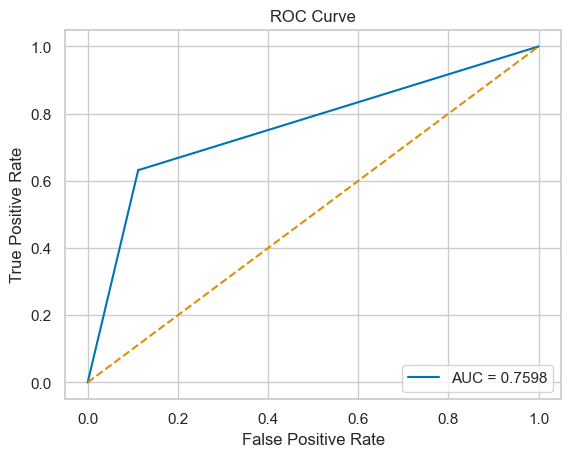

In [49]:
# Fit on training data
c45_pipeline.fit(X_train, y_train)

# Prediction on train set
y_pred_train_c45 = c45_pipeline.predict(X_train)
train_accuracy_c45 = accuracy_score(y_train, y_pred_train_c45) * 100

# Prediction on test set
y_pred_proba_c45 = c45_pipeline.predict_proba(X_test)[:, 1] # for ROC-AUC
y_pred_c45 = c45_pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_c45) * 100
tpr = recall_score(y_test, y_pred_c45, pos_label=1)
tnr = recall_score(y_test, y_pred_c45, pos_label=0)
f1 = f1_score(y_test, y_pred_c45)
roc_auc = roc_auc_score(y_test, y_pred_proba_c45)

print("C4.5 - Decision Tree Metrics:")
print(f"Train Accuracy: {train_accuracy_c45:.2f}%")
print(f"Test Set: ROC-AUC: {roc_auc:.4f} | Accuracy: {accuracy:.2f}% | F1 Score: {f1:.4f} | TPR: {tpr:.4f} | TNR: {tnr:.4f}")
print()
print(classification_report(y_test, y_pred_c45))
plot_roc_curve(y_test, y_pred_proba_c45)

In [50]:
param_dist_c45 = {
    "model__criterion": ["gini", "entropy", "log_loss"],
    "model__max_depth": randint(3, 20),
    "model__min_samples_split": randint(2, 20),
    "model__min_samples_leaf": randint(1, 10),
    "model__class_weight": [None,  "balanced"],
    "mrmr__n_features": randint(10, 50)
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=25)

c45_search = RandomizedSearchCV(
    estimator=c45_pipeline,
    param_distributions=param_dist_c45,
    n_iter=25,
    scoring="f1",
    cv=cv,
    n_jobs=-1,
    random_state=25,
    verbose=1
)

# Fit
c45_search.fit(X_train, y_train)
print("Best DT params:", c45_search.best_params_)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best DT params: {'model__class_weight': None, 'model__criterion': 'entropy', 'model__max_depth': 3, 'model__min_samples_leaf': 2, 'model__min_samples_split': 19, 'mrmr__n_features': 28}


Best threshold=0.74 with F1=0.6768
C4.5 - Decision Tree Metrics:
Train Accuracy: 87.17%
Test Set: ROC-AUC: 0.8976 | Accuracy: 87.70% | F1 Score: 0.6657 | TPR: 0.7920 | TNR: 0.8925

              precision    recall  f1-score   support

       False       0.96      0.89      0.92      3127
        True       0.57      0.79      0.67       572

    accuracy                           0.88      3699
   macro avg       0.77      0.84      0.80      3699
weighted avg       0.90      0.88      0.88      3699



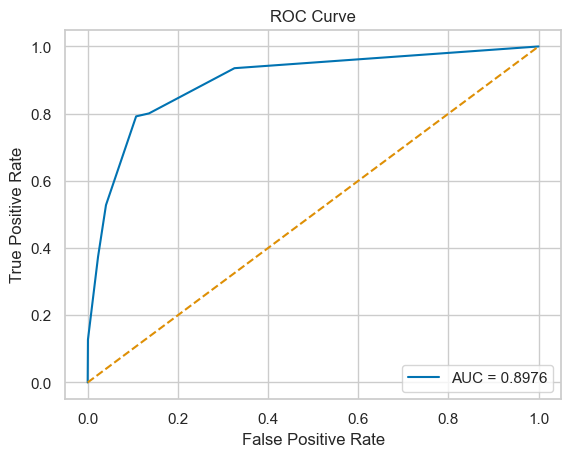

In [ ]:
# Final evaluation
best_c45 = c45_search.best_estimator_

# Create a holdout validation set for threshold tuning
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, stratify=y_train,
                                            test_size=0.2, random_state=25)

best_c45.fit(X_tr, y_tr)
best_thresh_c45, best_f1_c45 = find_best_threshold(best_c45, X_val, y_val)
print(f"Best threshold={best_thresh_c45:.2f} with F1={best_f1_c45:.4f}")

# Prediction on train set
y_pred_train_proba_c45 = best_c45.predict_proba(X_train)[:, 1]
y_pred_train_c45 = (y_pred_train_proba_c45 >= best_thresh_c45).astype(int)
train_accuracy_logr = accuracy_score(y_train, y_pred_train_c45) * 100

# y_pred_train_c45 = best_c45.predict(X_train)
# train_accuracy_c45 = accuracy_score(y_train, y_pred_train_c45) * 100

# Prediction on test set
y_pred_proba_c45 = best_c45.predict_proba(X_test)[:, 1] # for ROC-AUC
y_pred_c45 = (y_pred_proba_c45 >= best_thresh_c45).astype(int) 

accuracy = accuracy_score(y_test, y_pred_c45) * 100
tpr = recall_score(y_test, y_pred_c45, pos_label=1)
tnr = recall_score(y_test, y_pred_c45, pos_label=0)
f1 = f1_score(y_test, y_pred_c45)
roc_auc = roc_auc_score(y_test, y_pred_proba_c45)

print("C4.5 - Decision Tree Metrics:")
print(f"Train Accuracy: {train_accuracy_c45:.2f}%")
print(f"Test Set: ROC-AUC: {roc_auc:.4f} | Accuracy: {accuracy:.2f}% | F1 Score: {f1:.4f} | TPR: {tpr:.4f} | TNR: {tnr:.4f}")
print()
print(classification_report(y_test, y_pred_c45))
plot_roc_curve(y_test, y_pred_proba_c45)

# Best threshold=0.74 with F1=0.6768
# C4.5 - Decision Tree Metrics:
# Train Accuracy: 87.17%
# Test Set: ROC-AUC: 0.8976 | Accuracy: 87.70% | F1 Score: 0.6657 | TPR: 0.7920 | TNR: 0.8925

### Random Forest

In [54]:
rf_pipeline = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("mrmr", MRMRSelector(n_features=17)),
        ("smote", SMOTE(random_state=25)),
        ("model", RandomForestClassifier(random_state=25))
    ]
)

Random Forest Metrics:
Train Accuracy: 99.99%
Test Set: ROC-AUC: 0.9073 | Accuracy: 88.19% | F1 Score: 0.6507 | TPR: 0.7115 | TNR: 0.9130

              precision    recall  f1-score   support

       False       0.95      0.91      0.93      3127
        True       0.60      0.71      0.65       572

    accuracy                           0.88      3699
   macro avg       0.77      0.81      0.79      3699
weighted avg       0.89      0.88      0.89      3699



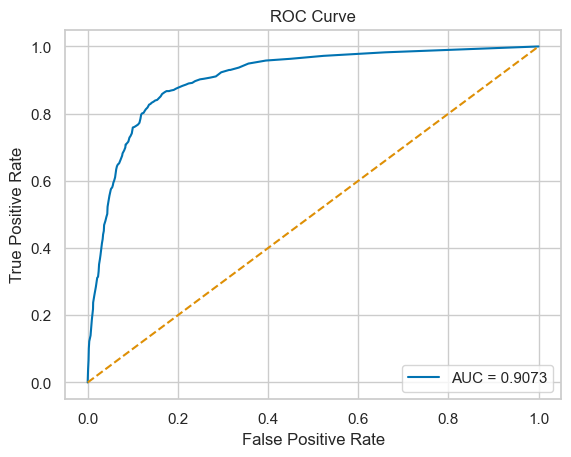

In [55]:
# Fit on training data 
rf_pipeline.fit(X_train, y_train)

# Prediction on train set
y_pred_train_rf = rf_pipeline.predict(X_train)
train_accuracy_rf = accuracy_score(y_train, y_pred_train_rf) * 100

# Prediction on test set
y_pred_proba_rf = rf_pipeline.predict_proba(X_test)[:, 1] # for ROC-AUC
y_pred_rf = rf_pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf) * 100
tpr = recall_score(y_test, y_pred_rf, pos_label=1)
tnr = recall_score(y_test, y_pred_rf, pos_label=0)
f1 = f1_score(y_test, y_pred_rf)
roc_auc = roc_auc_score(y_test, y_pred_proba_rf)

print("Random Forest Metrics:")
print(f"Train Accuracy: {train_accuracy_rf:.2f}%")
print(f"Test Set: ROC-AUC: {roc_auc:.4f} | Accuracy: {accuracy:.2f}% | F1 Score: {f1:.4f} | TPR: {tpr:.4f} | TNR: {tnr:.4f}")
print()
print(classification_report(y_test, y_pred_rf))
plot_roc_curve(y_test, y_pred_proba_rf)

In [56]:
# Hyperparameter distributions
param_dist_rf = {
    "model__n_estimators": randint(200, 1000),
    "model__max_depth": [None] + list(range(5, 40)),
    "model__min_samples_split": randint(2, 25),
    "model__min_samples_leaf": randint(1, 20),
    "model__max_features": ["sqrt", "log2", None],
    "model__class_weight": [None,  "balanced", "balanced_subsample"],
    "mrmr__n_features": randint(10, 50)
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=25)

rf_search = RandomizedSearchCV(
    estimator=rf_pipeline,
    param_distributions=param_dist_rf,
    n_iter=25,
    scoring="f1",
    cv=cv,
    n_jobs=-1,
    random_state=25,
    verbose=1
)

# Fit
rf_search.fit(X_train, y_train)
print("Best RF params:", rf_search.best_params_) 

Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best RF params: {'model__class_weight': 'balanced', 'model__max_depth': 38, 'model__max_features': 'log2', 'model__min_samples_leaf': 6, 'model__min_samples_split': 9, 'model__n_estimators': 607, 'mrmr__n_features': 23}


Best threshold=0.53 with F1=0.7061
Random Forest Metrics:
Train Accuracy: 91.95%
Test Set: ROC-AUC: 0.9304 | Accuracy: 89.78% | F1 Score: 0.7061 | TPR: 0.7430 | TNR: 0.9261

              precision    recall  f1-score   support

       False       0.95      0.93      0.94      3127
        True       0.65      0.74      0.69       572

    accuracy                           0.90      3699
   macro avg       0.80      0.83      0.82      3699
weighted avg       0.90      0.90      0.90      3699



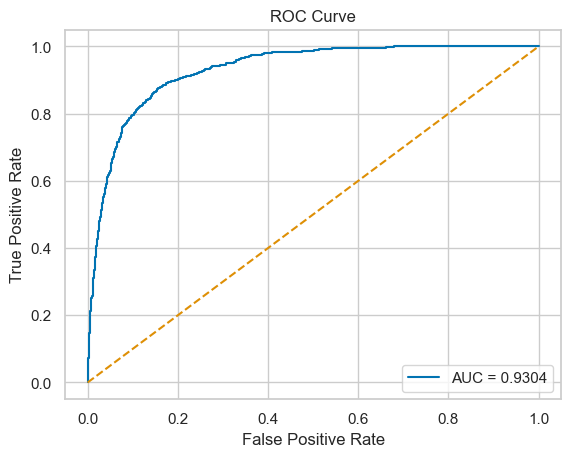

In [ ]:
# Final evaluation
best_rf = rf_search.best_estimator_

# Create a holdout validation set for threshold tuning
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, stratify=y_train,
                                            test_size=0.2, random_state=25)

best_rf.fit(X_tr, y_tr)
best_thresh_rf, best_f1_rf = find_best_threshold(best_rf, X_val, y_val)
print(f"Best threshold={best_thresh_rf:.2f} with F1={best_f1_rf:.4f}")

# Prediction on train set
y_pred_train_proba_rf = best_rf.predict_proba(X_train)[:, 1]
y_pred_train_rf = (y_pred_train_proba_rf >= best_thresh_rf).astype(int)
train_accuracy_rf = accuracy_score(y_train, y_pred_train_rf) * 100

# y_pred_train_rf = best_rf.predict(X_train)
# train_accuracy_rf = accuracy_score(y_train, y_pred_train_rf) * 100

# Prediction on test set
y_pred_proba_rf = best_rf.predict_proba(X_test)[:, 1] # for ROC-AUC
y_pred_rf = (y_pred_proba_rf >= best_thresh_rf).astype(int) 

accuracy = accuracy_score(y_test, y_pred_rf) * 100
tpr = recall_score(y_test, y_pred_rf, pos_label=1)
tnr = recall_score(y_test, y_pred_rf, pos_label=0)
# f1 = f1_score(y_test, y_pred_rf)
roc_auc = roc_auc_score(y_test, y_pred_proba_rf, average='weighted')

print("Random Forest Metrics:")
print(f"Train Accuracy: {train_accuracy_rf:.2f}%")
print(f"Test Set: ROC-AUC: {roc_auc:.4f} | Accuracy: {accuracy:.2f}% | F1 Score: {best_f1_rf:.4f} | TPR: {tpr:.4f} | TNR: {tnr:.4f}")
print()
print(classification_report(y_test, y_pred_rf))
plot_roc_curve(y_test, y_pred_proba_rf)

# Best threshold=0.53 with F1=0.7061
# Random Forest Metrics:
# Train Accuracy: 91.95%
# Test Set: ROC-AUC: 0.9304 | Accuracy: 89.78% | F1 Score: 0.7061 | TPR: 0.7430 | TNR: 0.9261

In [ ]:
# Build summary table
data_standard = {
    "Logistic Regression": {"ROC-AUC": 0.8986, "Accuracy": 0.8478, "F1 Score": 0.6038, "TPR": 0.7500, "TNR": 0.8657},
    "Decision Tree (C4.5)": {"ROC-AUC": 0.9176, "Accuracy": 0.8908, "F1 Score": 0.6844, "TPR": 0.7657, "TNR": 0.9137},
    "Random Forest": {"ROC-AUC": 0.9335, "Accuracy": 0.8965, "F1 Score": 0.6929, "TPR": 0.7552, "TNR": 0.9223}
}

df_results_standard = pd.DataFrame(data_standard)

styled_standard_df = (
    df_results_standard.style
        .highlight_max(axis=1, color="green")
        .format("{:.4f}")
        .set_caption("Results Using StandardScaler (Our Methodology)")
        .set_table_styles([
            {"selector": "caption",
             "props": [("font-size", "18px"),
                       ("font-weight", "bold"),
                       ("text-align", "center")]}
        ])
)

styled_standard_df

,Logistic Regression,Decision Tree (C4.5),Random Forest
ROC-AUC,0.8986,0.9176,0.9335
Accuracy,0.8478,0.8908,0.8965
F1 Score,0.6038,0.6844,0.6929
TPR,0.7500,0.7657,0.7552
TNR,0.8657,0.9137,0.9223


In [27]:
# Build summary table
data_robust = {
    "Logistic Regression": {"ROC-AUC": 0.8975, "Accuracy": 0.8383, "F1 Score": 0.5940, "TPR": 0.7570, "TNR": 0.8534},
    "Decision Tree (C4.5)": {"ROC-AUC": 0.9223, "Accuracy": 0.8602, "F1 Score": 0.6536, "TPR": 0.8444, "TNR": 0.8631},
    "Random Forest": {"ROC-AUC": 0.9318, "Accuracy": 0.8976, "F1 Score": 0.6841, "TPR": 0.7098, "TNR": 0.9324}
}

df_results_robust = pd.DataFrame(data_robust)

styled_robust_df = (
    df_results_robust.style
        .highlight_max(axis=1, color="green")
        .format("{:.4f}")
        .set_caption("Results Using RobustScaler (Our Methodology)")
        .set_table_styles([
            {"selector": "caption",
             "props": [("font-size", "18px"),
                       ("font-weight", "bold"),
                       ("text-align", "center")]}
        ])
)

styled_robust_df

,Logistic Regression,Decision Tree (C4.5),Random Forest
ROC-AUC,0.8975,0.9223,0.9318
Accuracy,0.8383,0.8602,0.8976
F1 Score,0.5940,0.6536,0.6841
TPR,0.7570,0.8444,0.7098
TNR,0.8534,0.8631,0.9324


# Paper Implementation

[Real-time prediction of online shoppers’ purchasing intention using multilayer perceptron and LSTM recurrent neural networks](https://link.springer.com/article/10.1007/s00521-018-3523-0)

In [28]:
from collections import defaultdict
# from itertools import combinations
# from scipy.stats import ttest_rel

In [30]:

# Models
mlp10 = MLPClassifier(hidden_layer_sizes=(10,), 
                      activation="relu", solver="adam",
                      max_iter=500, random_state=25)

mlp20 = MLPClassifier(hidden_layer_sizes=(20,), 
                      activation="relu", solver="adam",  
                      max_iter=500, random_state=25)

mlp30 = MLPClassifier(hidden_layer_sizes=(30,), 
                      activation="relu", solver="adam",
                      max_iter=500, random_state=25)

mlp40 = MLPClassifier(hidden_layer_sizes=(40,), 
                      activation="relu", solver="adam", 
                      max_iter=500, random_state=25)

dt = DecisionTreeClassifier(criterion="entropy",max_depth=5,
                            min_samples_split=11, min_samples_leaf=6, 
                            random_state=25)

svm = SVC( kernel="rbf", probability=True, random_state=25)

rf = RandomForestClassifier(n_estimators=671, max_depth=20, min_samples_split=24, 
                            min_samples_leaf=5, max_features='sqrt', 
                            class_weight=None, n_jobs=-1, random_state=25)

In [31]:
# Pipelines

pipelines_mlp = {
    "MLP10": Pipeline([("prep", preprocessor), ("mrmr", MRMRSelector(n_features=32)), ("smote", SMOTE(random_state=25)), ("clf", mlp10)]),
    "MLP20": Pipeline([("prep", preprocessor), ("mrmr", MRMRSelector(n_features=32)), ("smote", SMOTE(random_state=25)), ("clf", mlp20)]),
    "MLP30": Pipeline([("prep", preprocessor), ("mrmr", MRMRSelector(n_features=32)), ("smote", SMOTE(random_state=25)), ("clf", mlp30)]),
    "MLP40": Pipeline([("prep", preprocessor), ("mrmr", MRMRSelector(n_features=32)), ("smote", SMOTE(random_state=25)), ("clf", mlp40)])
}

pipelines_dtsvm = {
    "C4.5 DecisionTree": Pipeline([("prep", preprocessor), ("mrmr", MRMRSelector(n_features=32)), ("smote", SMOTE(random_state=25)), ("clf", dt)]),
    "SVM": Pipeline([("prep", preprocessor), ("mrmr", MRMRSelector(n_features=32)), ("smote", SMOTE(random_state=25)), ("clf", svm)]),
    "Random Forest": Pipeline([("prep", preprocessor), ("mrmr", MRMRSelector(n_features=39)), ("smote", SMOTE(random_state=25)), ("clf", rf)])
}


In [32]:
""" 100 repeated experiments - MLP 10-40 Neurons """

results = defaultdict(list)

for run in range(100):

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.3,
        stratify=y,
        random_state=run
    )

    for name, pipe in pipelines_mlp.items():
        pipe.fit(X_train, y_train)

        # ---- prediction logic ----
        y_pred = pipe.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        tpr = recall_score(y_test, y_pred, pos_label=1)
        tnr = recall_score(y_test, y_pred, pos_label=0)

        results[name].append((acc, f1, tpr, tnr))

In [33]:
""" 100 repeated experiments - DT, SVM, RF """

for run in range(100):

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.3,
        stratify=y,
        random_state=run
    )

    for name, pipe in pipelines_dtsvm.items():
        pipe.fit(X_train, y_train)

        # ---- prediction logic ----
        y_pred = pipe.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        tpr = recall_score(y_test, y_pred, pos_label=1)
        tnr = recall_score(y_test, y_pred, pos_label=0)

        results[name].append((acc, f1, tpr, tnr))

In [34]:
# Aggregate results
summary = {}

for model, scores in results.items():
    scores = np.array(scores)
    summary[model] = {
        "Accuracy": (scores[:,0].mean()),
        "F1 Score":       (scores[:,1].mean()),
        "TPR":      (scores[:,2].mean()),
        "TNR":      (scores[:,3].mean())
    }

df_summary = pd.DataFrame(summary)

paper_standard_df = (
    df_summary.style
        .highlight_max(axis=1, color="green")
        .format("{:.4f}")
        .set_caption("Results Using StandardScaler (Paper Methodology)")
        .set_table_styles([
            {"selector": "caption",
             "props": [("font-size", "18px"),
                       ("font-weight", "bold"),
                       ("text-align", "center")]}
        ])
)

paper_standard_df

,MLP10,MLP20,MLP30,MLP40,C4.5 DecisionTree,SVM,Random Forest
Accuracy,0.8612,0.8625,0.8677,0.8662,0.8757,0.8708,0.8915
F1 Score,0.6423,0.6345,0.6257,0.6219,0.6629,0.6396,0.6851
TPR,0.8053,0.7716,0.7151,0.7112,0.7879,0.7409,0.7634
TNR,0.8714,0.8791,0.8956,0.8946,0.8918,0.8946,0.9149


### Top Models Evaluation

In [36]:
# Models of interest using StandardScaler
metrics = {
    "Accuracy": 0,
    "F1 Score": 1,
    "TPR": 2,
    "TNR": 3
}

models_of_interest = df_summary[["MLP10", "C4.5 DecisionTree", "SVM", "Random Forest"]]

models_of_interest = (
    models_of_interest.style
        .highlight_max(axis=1, color="green")
        .format("{:.4f}")
        .set_caption("Results Using StandardScaler (Paper Methodology)")
        .set_table_styles([
            {"selector": "caption",
             "props": [("font-size", "18px"),
                       ("font-weight", "bold"),
                       ("text-align", "center")]}
        ])
)

models_of_interest

,MLP10,C4.5 DecisionTree,SVM,Random Forest
Accuracy,0.8612,0.8757,0.8708,0.8915
F1 Score,0.6423,0.6629,0.6396,0.6851
TPR,0.8053,0.7879,0.7409,0.7634
TNR,0.8714,0.8918,0.8946,0.9149
